<a href="https://colab.research.google.com/github/dan-a-iancu/airm/blob/master/S02_Descriptive_Prescriptive_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Machine Learning project

This exercise relies on the [California Housing Dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing). Your task is to **predict median house values in Californian districts**, given a number of features from these districts. Although the dataset is a bit older and smaller than what you might encounter nowadays, it serves as a very good pedagogical device. It has actually been featured in [Aurelien Geron's](https://github.com/ageron) recent book on machine learning in Python, and our notebook follows some of the developments there quite closely, but adds more guidelines to ensure a responsible implementation of the end-to-end ML pipeline.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Navigation</h3>

[1. Project Skeleton](#1)   
[2. Load the Data](#2)  
[3. Take a Quick Look at Data Structures](#3)   
[4. Create a Test Set](#4)    
[5. Discover and Visualize Data to Gain Insights](#5)  
&nbsp;&nbsp;&nbsp;&nbsp;[a. Visualizing Geographical Data](#5a)   
&nbsp;&nbsp;&nbsp;&nbsp;[b. Looking for Correlations](#5b)       
&nbsp;&nbsp;&nbsp;&nbsp;[c. Experimenting with Feature Combinations](#5c)     
[6.Preparing Data for Machine Learning Algorithms](#6)     
&nbsp;&nbsp;&nbsp;&nbsp;[a. Data Cleaning](#6a)     
&nbsp;&nbsp;&nbsp;&nbsp;[b. Handling Text and Categorical Features](#6b)     
&nbsp;&nbsp;&nbsp;&nbsp;[c. Column Transformers](#6c)     
&nbsp;&nbsp;&nbsp;&nbsp;[d. Transformation Pipelines](#6d)     
[7. Select and Train a Model](#7)     
&nbsp;&nbsp;&nbsp;&nbsp;[a. Training and Evaluating on Training Set](#7a)     
&nbsp;&nbsp;&nbsp;&nbsp;[b. Better Evaluation Using Cross Validation](#7b)     
[8. Fine-Tune a Model](#8)  
&nbsp;&nbsp;&nbsp;&nbsp;[a. Grid Search](#8a)     
&nbsp;&nbsp;&nbsp;&nbsp;[b. Analyse the Best Models and Their Errors](#8b)       
[9. Evaluate Your System on Test Set](#9)    
[10. References](#10)   

<a id="1"></a>
# 1. Project Skeleton
Before starting out any project, you should always first plan your steps a bit and have some clarity on a few core issues: what type of problem you are dealing with, where the data is coming from, what types of methods could be used, etc. Asking these questions before you "dive in" will help you gain more insights on your ML journey. The following are some key points to take into consideration.

Staircase
* What kind of ML problem statement is it? Is this a 'regression' problem or a 'classification' problem? Try to define it!
* What is the context where your model will be used? Is your output going to feed into another predictive or prescriptive model?
   * _This is important because ..._

* What is the data that is available?
* Keep a test data aside for EDA
* Understand your data
   * Explore relationships between various features and the output of interest, i.e., Exploratory Data Analysis
   * Detect any anomalies in your data: outliers, missing data, etc.
   * Are some features potentially problematic from an ethical or legal standpoint?
     * **Is it illegal to use certain features for the given prediction task?**
     * **Are there features that are missing that might affect other features?**
     * **Are there any unexpected feature values?**
     * **What signs of data skew do you see?**
* Try your intuition about the problem area:
   * _What can be important features that affect a house price? Location? Number of bedrooms or bathrooms? Population?_
* Data preprocessing: Building a pipeline for it
* Applying models to predict
* What must be the evaluation metric?
* Evaluate the model on Test data

**TO DO: Insert questions that pertain to fairness? HERE OR LATER?**

<font color=red>GUIDELINE FOR RESPONSIBLE IMPLEMENTATION.</font> 
Some important questions to bear in mind when auditing your dataset:

* **Are there missing feature values for a large number of observations?**
* **Are there features that are missing that might affect other features?**
* **Are there any unexpected feature values?**
* **What signs of data skew do you see?**
* Are some features potentially problematic from an ethical or legal standpoint?
     * **Is it illegal to use certain features for the given prediction task?**
     * **Are there features that are missing that might affect other features?**
     * **Are there any unexpected feature values?**
     * **What signs of data skew do you see?**

### Obtain a Data Dictionary

The first step is usually to make sure that you have a good **data dictionary** available, i.e., an explanation regarding each data field. <font color=red>**Try to gather as much context as possible regarding your data and the purpose of the ML algorithm you are building. The meaning of each field, but also how the data was collected and processed.**</font><br>

Here, suppose we did some due dilligence and found out the following information about the features and the target.

#### Features
*   `longitude`: A measure of how far west a district is (higher value is farther west)
*   `latitude`: How far north a district is (a higher value is farther north)
*   `housingMedianAge`: Median age of houses within the district (lower number is a newer building)
*   `totalRooms`: Total number of rooms within a district
*   `totalBedrooms`: Total number of bedrooms within a district
*    `population`: Total number of people residing within a district
*    `households`: Total number of households within a district
*    `medianIncome`: Median income for households within a district (measured in tens of thousands of US Dollars)
*    `ocean_proximity`: A variable that characterizes the location of the district with respect to the ocean/bay. Possible values: `<1HOCEAN`, `INLAND`, `NEAR OCEAN`, `NEAR BAY`, `ISLAND`. This variable was actually created by Aurelien Geron, for teaching purposes (details [here](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)).

#### Label (Target / Outcome)
*    `medianHouseValue`: Median house value for households within a district (measured in US Dollars)

______
<a id="2"></a>
# 2. Setup
The code below imports several modules that you may find useful when manipulating data and engaging with common ML tasks. A brief description of the packages is as follows:
   * numpy: numerical library for various mathematical operations
   * pandas: library for handling dataframes

In addition to importing the usual libraries, this setup code cell also installs a few extra modules:
   * [Facets](https://pair-code.github.io/facets/): an open-source tool created by [PAIR](https://research.google/teams/brain/pair/) that contains two robust visualizations we'll be using to aid in understanding and analyzing ML datasets.
   * ...

In [ ]:
#@title Import revelant modules and install Facets
import os
import sys
assert sys.version_info >= (3, 5)   # Python ≥3.5 is required

import urllib

import numpy as np
import pandas as pd
#import tensorflow as tf
#from tensorflow.keras import layers

!pip install --prefix {sys.prefix} seaborn==0.11.0
import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"  # Scikit-Learn version ≥0.20 required
import sklearn.metrics as metrics

# adjust reporting in pandas: max 10 rows and two-digit precision
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:,.2f}".format

# Make sure Matplotlib runs inline, for nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless some warnings
import warnings
#warnings.filterwarnings(action="ignore", message="^internal gelsd")
#warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore")

# Create a function to save figures to a desired local folder
FIGURE_FOLDER = "Figures"
FIGURE_PATH = os.path.join(".",FIGURE_FOLDER)
os.makedirs(FIGURE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIGURE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

_________
<a id="3"></a>
# 3. Download the Data
Typically, you might need to download your data from some remote website repository or database such as Kaggle, UCI, etc. Here, we will download the data as a CSV (comma separated value) file from Aurelien Geron's github site, and save it to a local folder.

_You do not need to worry about understanding the code below. In practice, all you would need to do is change the URL to point to the right website; if you already have the data stored locally in a suitable format (e.g., as a CSV or Excel file), you can skip this step._

In [ ]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"  # full URL to the dataset
local_csv = "housing.csv"   # name of local file where you want to store the downloaded file
urllib.request.urlretrieve(url, local_csv)    # download from website and save it locally

('housing.csv', <http.client.HTTPMessage at 0x7f882734f0b8>)

___________
<a id="4"></a>
# 4. Load the Data and Take a Quick Look
We will use the `pandas` function `read_csv()`, which reads in a dataset from a CSV file and stores it as a DataFrame variable that we call `data`.

In [ ]:
data = pd.read_csv(local_csv)
#data = pd.read_csv("./housing_na.csv")

Take a quick look at the data: use the `head()` method to see the top few rows or the `tail()` method to see the bottom few rows.

In [ ]:
# see the top 10 rows
data.head(10)

longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...          452,600.00         NEAR BAY
1    -122.22     37.86  ...          358,500.00         NEAR BAY
2    -122.24     37.85  ...          352,100.00         NEAR BAY
3    -122.25     37.85  ...          341,300.00         NEAR BAY
4    -122.25     37.85  ...          342,200.00         NEAR BAY
5    -122.25     37.85  ...          269,700.00         NEAR BAY
6    -122.25     37.84  ...          299,200.00         NEAR BAY
7    -122.25     37.84  ...          241,400.00         NEAR BAY
8    -122.26     37.84  ...          226,700.00         NEAR BAY
9    -122.25     37.84  ...          261,100.00         NEAR BAY

[10 rows x 10 columns]

In [ ]:
# see the bottom 5 rows
data.tail(5)

longitude  latitude  ...  median_house_value  ocean_proximity
20635    -121.09     39.48  ...           78,100.00           INLAND
20636    -121.21     39.49  ...           77,100.00           INLAND
20637    -121.22     39.43  ...           92,300.00           INLAND
20638    -121.32     39.43  ...           84,700.00           INLAND
20639    -121.24     39.37  ...           89,400.00           INLAND

[5 rows x 10 columns]

Note that each row (or "sample") in our data represents one district in California, and there are 10 columns (a.k.a. "attributes", "fields", "variables", etc.): `longitude`, `latitude`, `housing_median_age`, `total_rooms`,	`total_bedrooms`, `population`,	`households`, `median_income`, `median_house_value`, and `ocean_proximity`. The first 9 attributes seem to be **numeric**, and the last one (`ocean_proximity`) looks like a text and seems to have repeated values, so it is likely **categorical**. 

It is always a good idea to cross-check the information you see above against your **data dictionary**, and see if you spot any inconsistencies. So far everything seems to be in order, which is good news.

**Notation**. We may have to write a few formulas later, so it would be useful to have a bit of notation at this point:
   - We will use $i$ to denote a sample (or row) in our data. The easiest way is to think of $i$ as the index of the row in the table above. For instance, $i=0$ refers to the first sample, $i=1$ refers to the second row, etc.
   - We will use $y_i$ to denote the value that our **target** (i.e., the `median_house_value`) takes in the $i$-th sample. For instance, $y_0 = 452,600$.
   - We will use $x_i$ to denote the value that a particular feature $x$ takes in the $i$-th sample. For instance, if $x$ is `total_rooms`, then $x_{20635} = 1,665$.

_________________
<a id="5"></a>
# 5. Exploratory Data Analysis (EDA)
The next step is to start exploring your data through visualizations, summary statistics and a correlation analysis. This step is intended to help you better understand the data you are dealing with and how it relates to the prediction task you are interested in, but also to pick up on certain potentially problematic issues in the data (such as missing or incorrect entries, censoring issues, etc.)

__Remark.__ There is some debate as to whether one should engage in EDA __before__ or __after__ splitting the data into a training and a test set. We choose to do EDA first, before any other tasks. But be aware that this approach is not perfect, as we may be inadvertently introducing a slight __"data snooping" bias__ into our ML process: by looking at the entire dataset, we are also looking at the test set, which is supposed to consist of entirely new data that our ML algorithms have not seen at all, and on which we would like to test their performance. However, our view is that it is critical to understand the entire dataset in order to make certain responsible choices, and that is preferrable even if it means introducing some slight bias (or better put, optimism...) in the quality of the estimation. 

<a id="5A"></a>
## A-1. Exploring the Data with Facets
The researchers at Google [PAIR](https://research.google/teams/brain/pair/) have developed a very powerful open-source tool called [Facets](https://pair-code.github.io/facets/) that allows exploring the data through an easy-to-use graphical user interface. Let us install the package and use it on our dataset.

In [ ]:
# For facets overview
from IPython.core.display import display, HTML
import base64
!pip install facets-overview
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

We will rely on [Facets Overview](https://pair-code.github.io/facets/), which enables us to analyze each data attribute (numeric as well as categorical) and do a quick assessment of data quality (e.g., evaluate missing data, etc.)

In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': data, 'name': 'Original_Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

<font color=red>HAVE THIS HERE OR JUST BELOW?</font>
### FairAware Task #1

Review the descriptive statistics and histograms for each feature. Click the **Show Raw Data** button above the histograms for categorical features to see the distribution of values per category.

Then, try to answer the following questions:

1. Do you notice any peculiar "pattern" in the values of the attribute? For instance:
      * Are there missing values?
      * Are there unexpectedly high or low values? 
      * Do some values occur more or less often than you would expect?
      * Do you see any sign of skew?
2. Is the pattern "robust"? For instance: 
      * Does it depend on the way in which you are visualizing the data?
      * Does it represent reality?
3. Does the pattern have meaningful implications in the given problem context? For instance:
      * Could it lead the ML algoritms to over-represent or under-represent something?
      * Could it generate bias in the predicted values?
4. Are there any data features that may raise concerns (e.g., due to privacy or bias) when used for the prediction task?

<a id="5a"></a>
## A-2. "Nuts & Bolts" When Exploring the Data
Although the Facets tool is quite powerful and easy to use, it is important to understand at a slightly deeper level some of the processes that underpin it. This will enable you to replicate the functionality (useful when you don't have access to Python or Google's `tensorflow` package), scale it up (useful if your dataset has thousands of variables), and avoid certain pitfalls that can emerge in the process.

#### Examine the Data Types
To start, it is good practice to check the exact type of data you are dealing with. You can use the `info()` method for that.

In [ ]:
# take a look at the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This confirms that the dataset has 20640 entries (i.e., rows) that are numbered from 0 to 20639, and a total of 10 columns. You can actually confirm this by cross-checking with the outputs from `head()` and `tail()` above. (Note that the very first column in those outputs does not correspond to an actual data column, but instead contains the index of the row, i.e., the value from 0 to 20639.)

From `Dtype`, you can also read the type of the data: columns 0-8 are reported as `float64` values, which means that they are indeed _numeric_. `ocean_proximity` is reported as a Python `object`, which could in principle be anything. But you probably noticed from the earlier output that its values look like a text string and seem to be repetitive, which suggests that this is a _categorical_ attribute.

From `Non-Null Count`, you can also see that all fields have 20,640 non-null values except `total_bedrooms`, which only has 20,433. This means that 207 districts are missing this value! In practice, it is **critical** to understand which fields have missing or erroneous values and figure out a way to deal with these, so we will return to this issue amply in subsequent sections, when we explore and clean the data. 

#### Summary statistics
Next, let's obtain some quick summary statistics. You can do this using `describe()` method of your `pandas` DataFrame, which will display useful statistics for all the **numeric** attributes in your data.

In [ ]:
# take a look at summary statistics for numeric attributes
data.describe()

longitude  latitude  ...  median_income  median_house_value
count  20,640.00 20,640.00  ...      20,640.00           20,640.00
mean     -119.57     35.63  ...           3.87          206,855.82
std         2.00      2.14  ...           1.90          115,395.62
min      -124.35     32.54  ...           0.50           14,999.00
25%      -121.80     33.93  ...           2.56          119,600.00
50%      -118.49     34.26  ...           3.53          179,700.00
75%      -118.01     37.71  ...           4.74          264,725.00
max      -114.31     41.95  ...          15.00          500,001.00

[8 rows x 9 columns]

The `count`, `mean`, `min` and `max` rows are hopefully self-explanatory. `std` stores the *standard deviation*, and the `25%`, `50%` and `75%` are the *percentiles* of the distribution of values. These statistics are a useful summary, and will give you a quick sense of the spread in values for your numeric fields. But to gain more insight, it is usually helpful to combine them with a visualization of the entire distribution of values, by plotting *histograms* or *boxplots*.

**Definition.** A _histogram_ is a bar plot where the horizontal axis is divided into a set of discrete bins and the count of observations falling within each bin is shown on the vertical axis using the height of the corresponding bar. 

**Definition.** A _boxplot_ is a standardized way of displaying all the values of an attribute based on a five-number summary: the minimum, the maximum, the sample median, and the 25% and 75% quantiles.

For instance, let's create a histogram and a boxplot of the values for the `housing_median_age` attribute by using the `matplotlib pyplot` methods [`hist()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) and [`boxplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot) respectively, and plot these side-by-side in a single figure (with one row and two columns).

Saving figure initial_histogram_and_boxplot


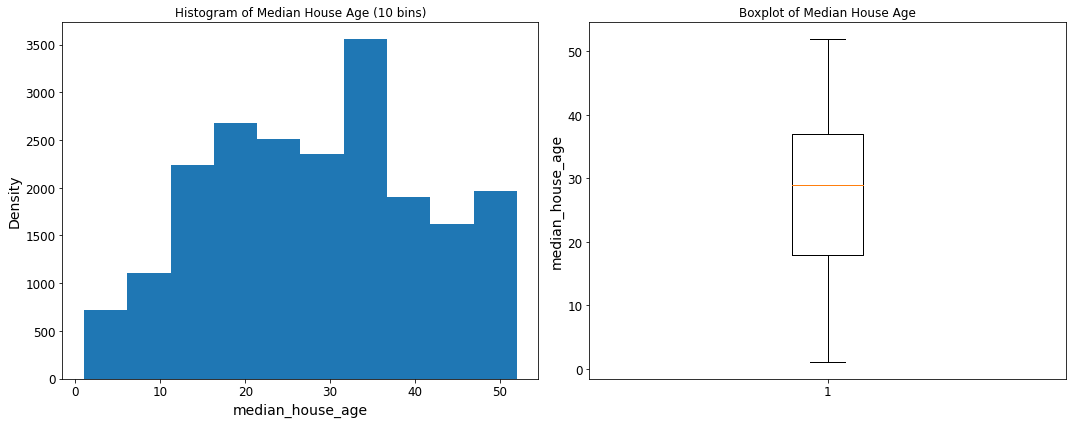

In [ ]:
# build a histogram and a boxplot using Matplotlib built-in functions 
fig = plt.figure(figsize=(15,6))  # create a figure of the desired size

# use subplot() to select the correct subfigure inside the figure
plt.subplot(1,2,1)  # 1,2,1 says that we have 1 row and 2 columns (of subfigures), and we select subfigure 1 in the table
plt.hist(data["housing_median_age"], bins=10)   # a simple histogram with 10 bins
plt.xlabel("median_house_age")
plt.ylabel("Density")
plt.title( "Histogram of Median House Age (10 bins)")

plt.subplot(1,2,2)  # now select the second subfigure
plt.boxplot(data["housing_median_age"])  # a simple boxplot
plt.ylabel("median_house_age")
plt.title("Boxplot of Median House Age")
#plt.show()
save_fig("initial_histogram_and_boxplot")

<font color=red>When building histograms, always try different values for the **number of bins** or **bin width**.</font><br> 
The number (or width) of bins is critical when building histograms: a wrong choice can mislead by obscuring important patterns or by creating patterns out of pure randomness. The plotting routines try to use a reasonable default choice, but **you should never be over-reliant on automatic approaches**, because they depend on particular assumptions about your data. It is always advisable to check that whatever pattern you observe remains reasonably consistent as you change the bin number/width. To adjust the number of bins, set the `bins` parameter, as below.

Saving figure histograms_number_of_bins


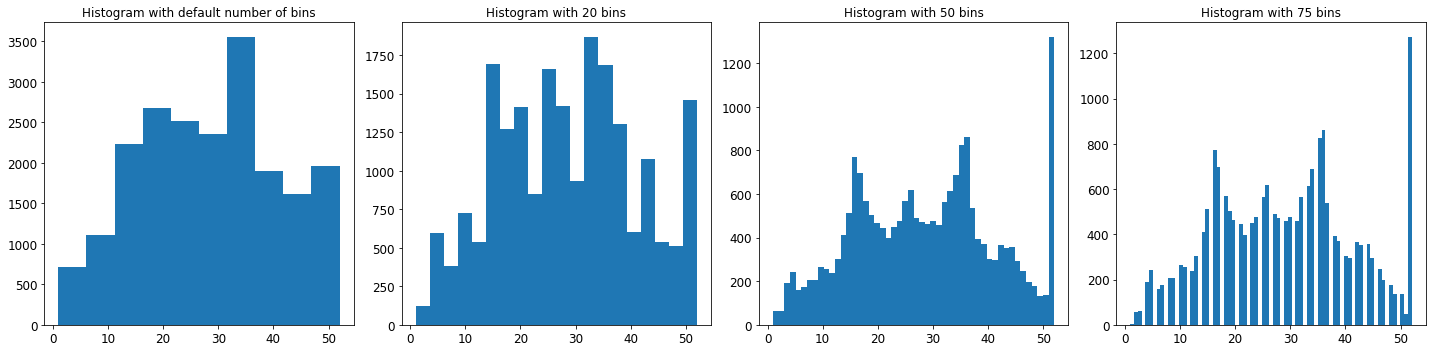

In [ ]:
# build histograms with different bin sizes 
plt.figure(figsize=(20,5)) 

plt.subplot(1,4,1)
plt.hist(data["housing_median_age"])   # histogram with default choice
plt.title( "Histogram with default number of bins")

plt.subplot(1,4,2) 
plt.hist(data["housing_median_age"], bins=20)   # histogram with 20 bins
plt.title( "Histogram with 20 bins")

plt.subplot(1,4,3)
plt.hist(data["housing_median_age"], bins=50)   # histogram with 50 bins
plt.title( "Histogram with 50 bins")

plt.subplot(1,4,4)
plt.hist(data["housing_median_age"], bins=75)   # histogram with 75 bins
plt.title( "Histogram with 75 bins")

save_fig("histograms_number_of_bins")

Certain Python packages have routines that allow more flexibility regarding the number of bins. For instance, the [`seaborn`](https://seaborn.pydata.org/index.html) package extends `matplotlib` and also allows creating even nicer graphics. Let's build a histogram and a boxplot using this package. Note that when creating the histogram, we use `bins="fd"` as an option: this implements an automated rule for the bin width (called Friedman-Diaconis) that works reasonably well in many settings. 

Saving figure histo_boxplot_seaborn


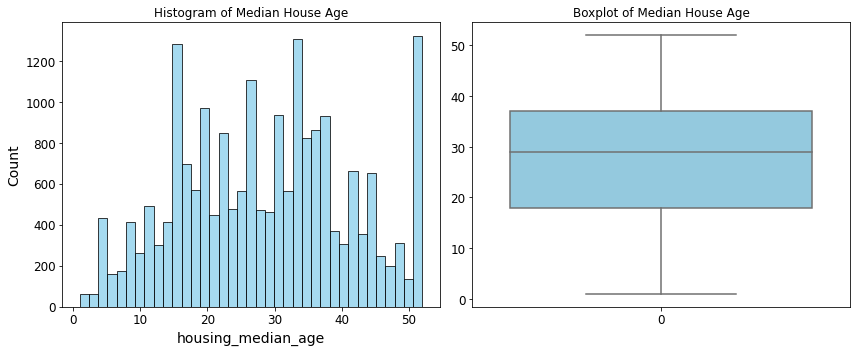

In [ ]:
# build histograms using the seaborn package
import seaborn as sns

plt.figure(figsize=(12,5)) 

# histogram with Friedman-Diaconis rule
plt.subplot(1,2,1)
sns.histplot(data = data["housing_median_age"], bins="fd", color="skyblue").set_title("Histogram of Median House Age")

# boxplot
plt.subplot(1,2,2)
sns.boxplot(data=data["housing_median_age"], color="skyblue").set_title('Boxplot of Median House Age')

save_fig("histo_boxplot_seaborn")

Following the process above will allow you to visualize one numeric attribute at a time. If you do not have too many numerical attributes, a convenient way to obtain **all histograms in one shot** is by using the `pandas` build-in [`hist()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) method.

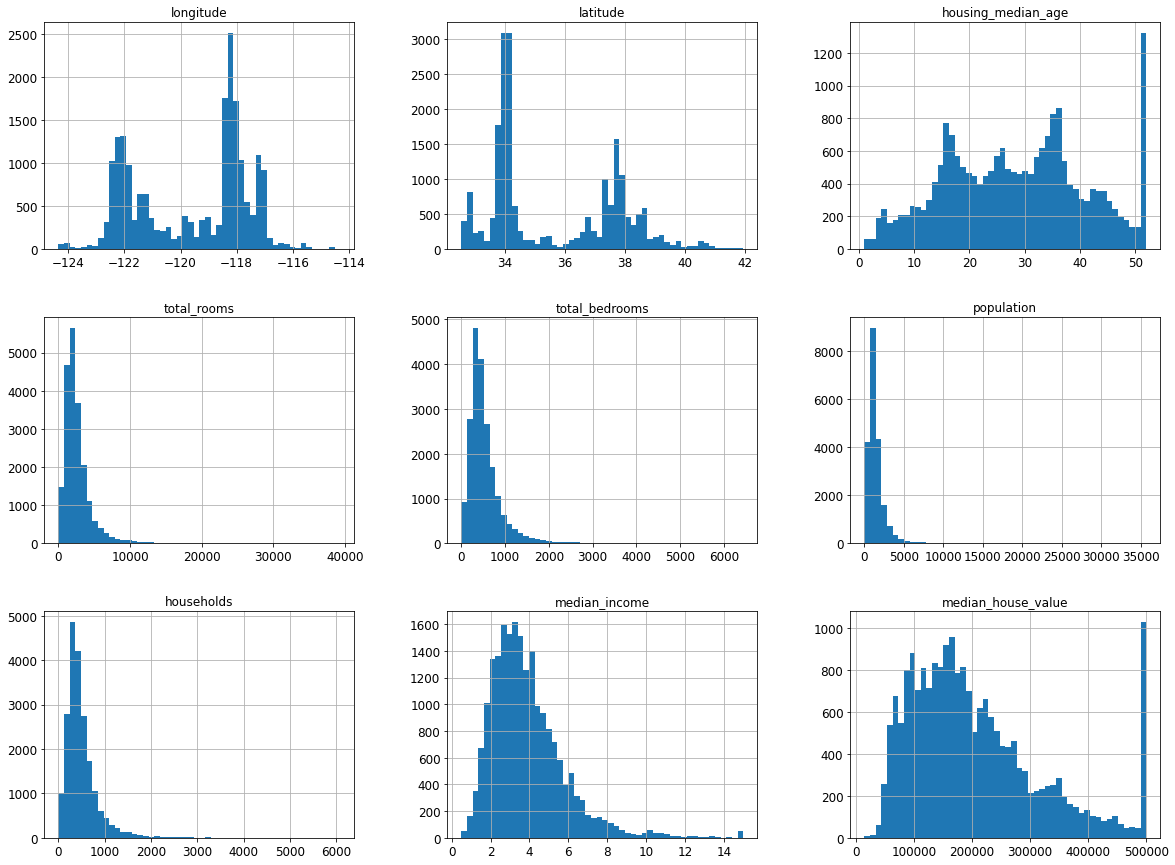

In [ ]:
# plot a histogram (using 50 bins) for each numeric attribute
data.hist(bins=50, figsize=(20,15))
plt.show()

### Visualizing Geographic Data

If your data also contains numeric attributes with geographic meaning, it may be very useful to try a different visualization  overlaid on top of actual maps. For instance, we can use the DataFrame's [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method to do a scatter plot of `latitude` and `longitude`, and overlay it on a map of California.

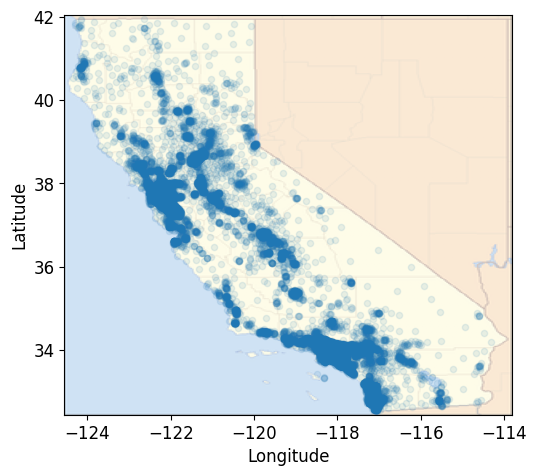

In [ ]:
# scatter plot of the latitude and longitude of the districts on top of a map
map_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG"

fig = plt.figure(dpi = 100,figsize = (5,5))
ax = fig.add_axes([1,1,1,1])

import matplotlib.image as mpimg
california_img = mpimg.imread(map_url)

data.plot(kind="scatter", x="longitude", y="latitude", figsize = (8,4), ax=ax, alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.show()

<a id="5d"></a>
### Categorical Attributes
Recall that our data also has a categorical attribute, namely `ocean_proximity`. For such attributes, the `value_counts()` method of the `pandas` DataFrame can tabulate information similar to a histogram, recording all the values and their frequency.

In [ ]:
# see the values of a categorical attribute
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As for visualization, the `seaborn` package contains very useful [plotting tools](https://seaborn.pydata.org/tutorial/categorical.html) for categorial variables. For instance, we can plot a histogram using the [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) method.

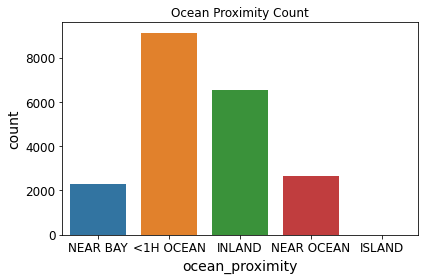

In [ ]:
# histogram of ocean_proximity categorical attribute
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="ocean_proximity", orient="v", dodge=True).set_title('Ocean Proximity Count')
plt.tight_layout()
plt.show()

### TASK #1. 
**Let's revisit our earlier questions and see if you changed your mind about any of the issues.<br>
Using the information above, go through each attribute and answer the following questions:**
1. Are there any missing values?
2. Do you notice any pattern in the values of the attribute? For instance:
  * Are there unexpectedly high or low values? 
  * Do some values occur more often than you'd expect?
  * Do you see any sign of skew?
3. Is the pattern robust? For instance, does it change with the number of bins used when plotting the histogram?
4. What does the "pattern" tell you about the feature or the problem context?
5. Are there any features that may raise concerns (e.g., due to privacy or bias) when used for the prediction task?

Some of the things you may have noticed:

1. The `households` histogram has a "heavy right tail", i.e., the values extend much farther to the right of the median than to the left. (In fact, this observation also applies to many other attributes as well). This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more "bell-shaped" distributions.

2. The `housing_median_age` and the `median_house_value` exhibit a sharp peak at the right end of the histogram. This suggests that the values for these features may have been capped. Working with such **censored** or **pre-processed** attributes is quite common in Machine Learning and is not problematic in itself, but the context is critical to make a responsible determination. You should always try to understand **how your data was collected and pre-processed**. Specifically, the capping here can be particularly problematic for the `median_house_value` attribute, which is actually your target/label (i.e., what you are trying to predict). Your ML algorithms may learn that prices never go beyond the upper limit of 500,000 USD, but that is probably not the case in reality, and would simply reflect an unfortunate data censoring issue. Under these circumstances, you would need to check with your client team or whomever will use your system's output to see if this poses a problem. If the intended use cases require precise predictions even beyond the 500,000 cap, then you have mainly two options:
   a. Collect proper labels for the districts whose labels were capped.
   b. Remove those districts from your data (since your system should not be trained or evaluated on such labels).

3. The `latitude` and `longitude` features seem to exhibit two peaks each. Perhaps these correspond to some densely populated areas, but it is hard to tell just from the numbers. Here, it is more helpful to use the map visualization to get a sense of the geographical features. This actually allows identifying locations with a higher density of points/districts: you can see that these correspond to roughly three areas, and if you are familiar with California you may even identify these: the Bay Area to the north (west), the Los Angeles and San Diego areas to the south, and a long line of higher density of points in the Central Valley (near Sacramento and Fresno).<br>
This map also reveals particular areas of California from which your dataset contains very few points. It could be that your dataset is accurately reflecting reality (i.e., there are simply fewer households there), but this could also be a rather serious **bias in data collection** (for instance, perhaps the folks who gathered your data never traveled to those areas!) In either case, you should be very mindful of the issue because your ML algorithms are not likely to perform well for districts drawn from such areas. The earlier comments in bullet #2 regarding the censoring issue for `median_house_value` also apply here: you should again consider carefully how your system is going to be used, and you should either gather more data or drop those records and focus on building a system that only predicting for certain regions of California.

4. The `median_income` attribute does not look like it is expressed in US dollars (USD). At this stage, it is probably useful to go back and check with the team that collected the data regarding any processing or censoring that may have taken place. For our purposes here, suppose that you are told that the data was scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes.

5. The `total_bedrooms` feature only has 20,433 non-null values out of 20,640 records, which means that 207 districts are missing the value! Apart from going back to the data team and asking about the collection and recording process, there are a few other things you can do here, which we will discuss at length in the data cleaning stage. <br>
Also note that `total_bedrooms` takes very large values, in the thousands (this is also true for `total_rooms`). This may seem bizarre, but it is actually not surprising given that this represents the **total number** in the district. However, note that the minimum value in the dataset actually takes a very small value: 1. In fact, the `total_rooms`, `population` and `households` attributes also take minimum values that are unexpectedly small (2, 3 and 1, respectively). Either this is a data issue or there are some districts that are very small. This may be worth a closer look, so we will examine it again.

6. The various numeric attributes have very different scales. This may be problematic for certain ML algorithms, so we will revisit it later when we explore feature scaling.

7. The categorical feature `ocean_proximity` has a rather uneven distribution. In particular, the vast majority of the data is either `<1H OCEAN` (9,136 records) or `INLAND` (6,551 records), a few records are `NEAR OCEAN` (2,658) or `NEAR BAY` (2,290) and only 5 records are listed as `ISLAND`! (the histogram actually looks very deceving here, so it is better to look at the counts). This is a rather serious **data sampling** issue, and it means that your ML algorithms are not likely to perform well for districts on islands. The same comments as in bullet #3 apply here as well. In addition to trying to collect more data or removing those districts altogether, we could also try to re-define the categories (e.g., by aggregating `ISLAND` and `NEAR OCEAN` into one group).

Following this quick analysis, you may want to revisit particular rows of the dataset to check for potential data errors. For instance, we can use the `loc` function to locate and display the rows based on the value of a specific column attribute. Below, we display all the districts where `households`=1.

In [ ]:
# locate rows with 1 bedroom
data.loc[data['households'] == 1]

longitude  latitude  ...  median_house_value  ocean_proximity
16171    -122.50     37.79  ...          500,001.00         NEAR BAY

[1 rows x 10 columns]

In practice, this approach can allow you to identify and perhaps flag particular problematic records for later data-cleaning. This record looks a bit peculiar (1 household with 8 rooms and 1 bedroom, and a population of 13), but it is not clear that this is either erroneous or an outlier, so we will not flag it further.

<font color=red>**POTENTIAL PRIVACY ISSUE.**</font> A more subtle point here is that we have districts in our data that correspond to a **single household**. This **can be problematic** because it means that the dataset we are working with may not be sufficiently annonymized, so we - and any ML algorithms that we build - may be able to identify and discriminate based on information on unique households. **Whether such issues arise and are a concern is generally context-dependent, but it is critical to make sure that you are not relying on data that would place you in legal deepwater (e.g., due to privacy, bias/discrimination, etc.)** We will revisit these issues at length in a future class.

<a id="5c"></a>
## B. Looking for Correlations
Now that we have some understanding of the attributes, the next step is to understand the _relationships_ between them. The main things to look for are:
   * How are the attributes related to the prediction target `median_house_value`?
   * Are certain predictive features strongly correlated among with other predictive features? (If so, that could lead to multi-collinearity problems)

We could again rely on Google PAIR's [Facets](https://pair-code.github.io/facets/) package, which provides an interactive tool called **Facets Dive** for visualizing relationships among features (and even individual data points). When the dataset is large, it is best not to do this using the entire data but rather with a *random sample*, as below.

In [ ]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 5000 #@param
  
data_dive = data.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=data_dive)
display(HTML(html))

## Task #2

Use the menus on the left panel of the visualization to change how the data is organized:

1. In the **Binning | X-Axis** menu, select **median_income**, and in the **Binning | Y-Axis** menu, select **median_house_value**. How would you describe the relationship between median income and median house value?

2. Next, in the **Binning | X-Axis** menu, select  **marital_status**, and in the **Color By** and  **Label By** menus, select **gender**. What noteworthy observations can you make about the gender distributions for each marital-status category?

**As you perform the above tasks, keep the following questions in mind:**

1. Do you notice any peculiar "pattern" in the relationships? For instance:
      * Do certain features exhibit a strong (positive or negative) correlation?
2. Is the pattern "robust"? For instance: 
      * Does it depend on the way in which you are visualizing the data?
      * Does it change depending on the values of one of the features?
      * Is it different than what you might expect / do you think it represents reality?
3. Does the pattern have meaningful implications in the given problem context? For instance:
      * Could it lead the ML algoritms to over-represent or under-represent something?
      * Could it generate bias in the predictions?
4. Are there any relationships among features that may raise privacy or bias concerns when (one or more of) the features are used for the prediction task?

<a id="5d"></a>
## B-2. "Nuts and Bolts" in Correlation Analysis
As with our initial exercise in EDA, it is very useful to go deeper and master some of the main processes that are useful when analysing the relationships between features. The starting point is to compute and visualize the *correlation coefficients* between the various attributes.

**Definition.** Recall that the *correlation coefficient* always takes values between -1 and 1. Values close to 1 correspond to strong positive correlation, meaning that when one of them takes large (respectively, small) values, the other one also takes large (respectively, small) values; speaking loosely, you can think of this as "the variables moving together". Values close to -1 correspond to strong negative correlation, meaning that when one of the variables takes large values, the other one tends to take small values ("the variables move opposite to each other"). Finally, values close to zero mean that there is weak correlation, so there is no strong relationship between the two variables.

Note that correlation coefficients are only computed for *numerical* attributes. Since the dataset is not large, we can obtain the entire matrix of coefficients (i.e., for every pair of attributes) in one shot with the `corr` method, and we can visualize it using the [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in the `seaborn` package.

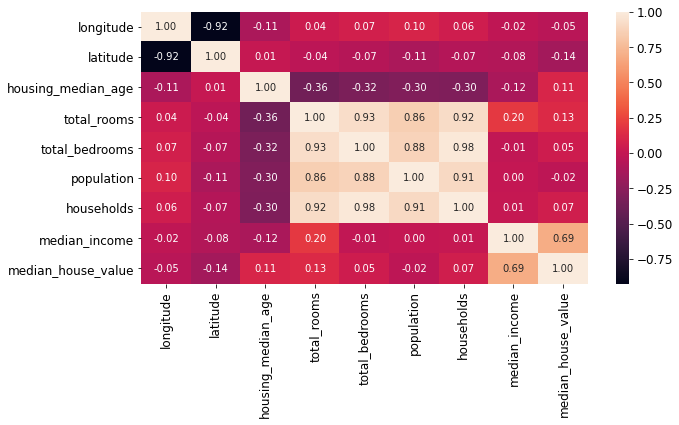

In [ ]:
# calculate the entire correlation matrix
corr_matrix = data.corr()

# visualize the correlation matrix as a heatmap
plt.figure(figsize = (10,5));
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

An alternative way to vizualize the correlations is through scatter plots. We can use the [`scatter_matrix`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) function in the `pandas` package, which does one scatter plot for every pair of attributes. When there are many attributes, we can simply specify which attributes to include: for instance, the code below includes scatter plots for `median_house_value`, `median_income`, `total_rooms`, and `housing_median_age`.

Saving figure scatter_matrix_plot_pandas


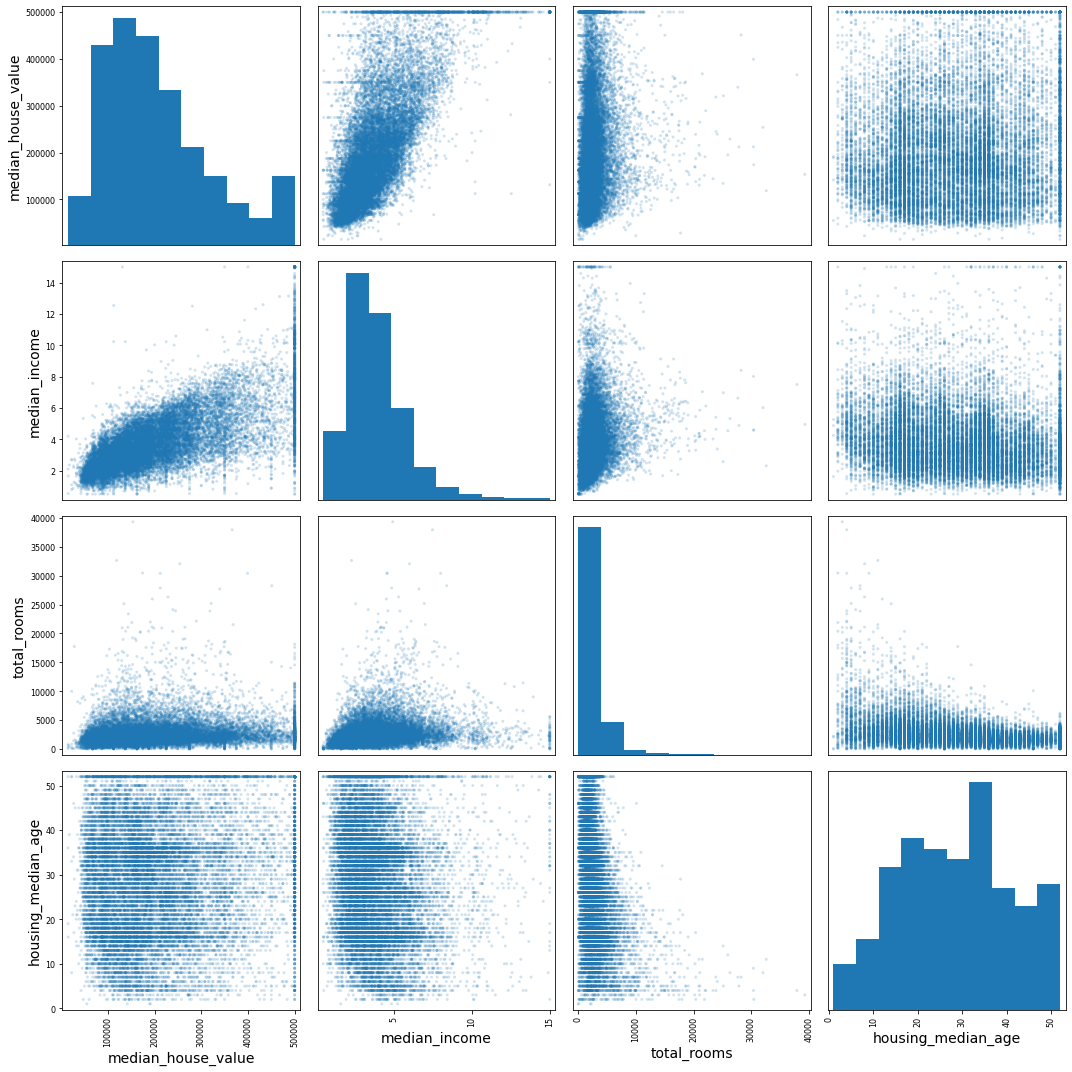

In [ ]:
# do scatter plots for several specific attributes using pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(15, 15), alpha=0.2)
save_fig("scatter_matrix_plot_pandas")

Note that in the output above, the main diagonal contains a histogram instead of a scatter plot. The reason is that a scatter plot there would be trivial, as all the points would fall on the 45-degree line, so smart packages are instead plotting a histogram of the respective attribute.

We could achieve the same thing with the [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function in the `seaborn` package, which produces nicer graphics. Below we generate scatter plots for **all** the pairs, which may take a bit of time to run. (To speed it up, use the second command, where `corner=True` only plots the lower half of the matrix.)

Saving figure scatter_matrix_plot_seaborn


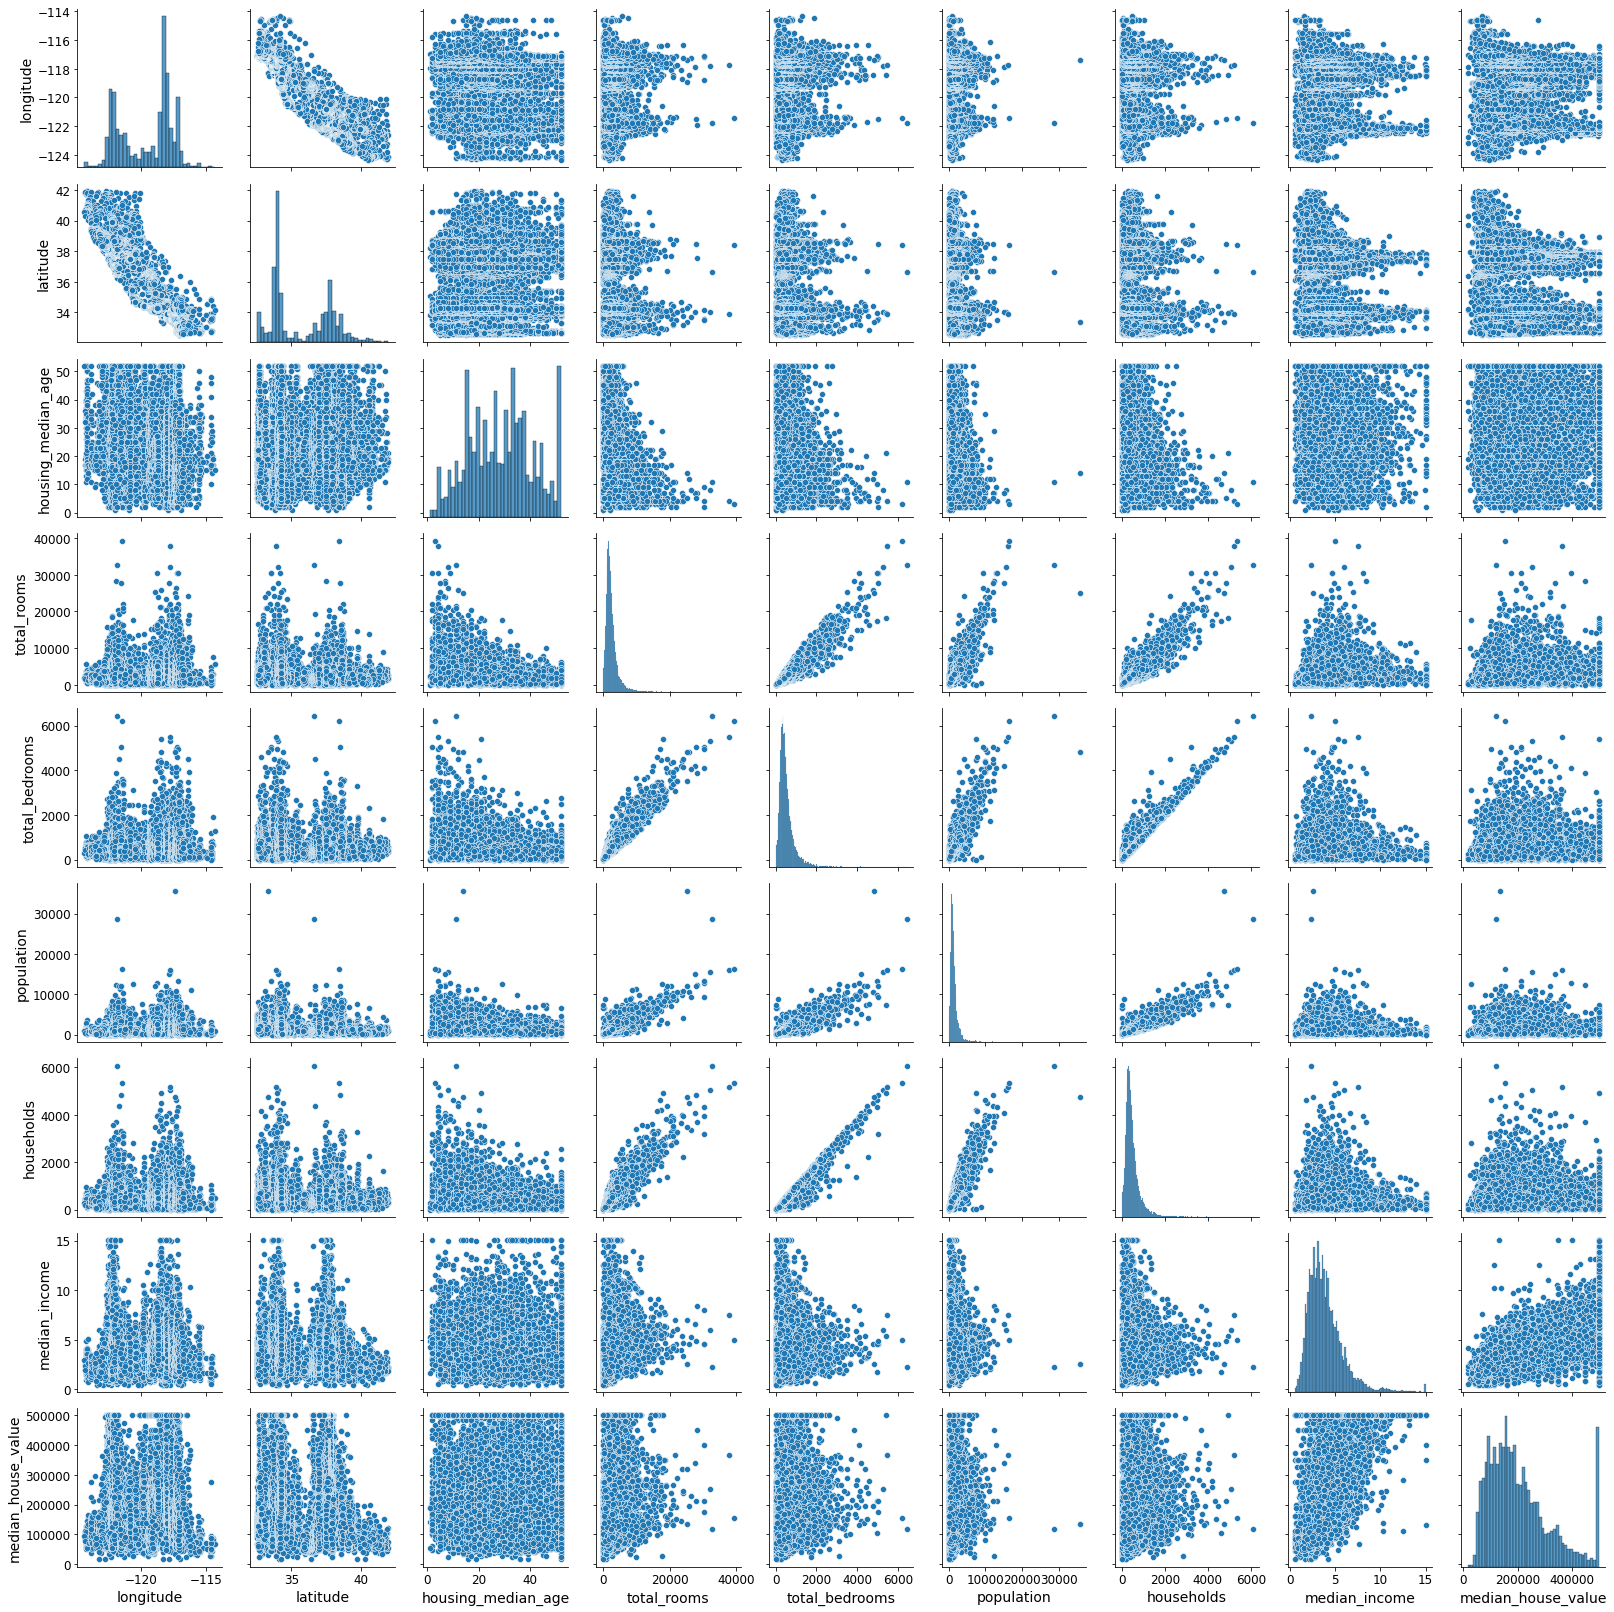

In [ ]:
# scatter plots in the seaborn package
sns.pairplot(data)
# sns.pairplot(data, corner=True)

save_fig("scatter_matrix_plot_seaborn")

A critical thing to examine at this step is how each attribute correlates with the `median_house_value`, which is our target variable. We can start by displaying a sorted list of all the correlation coefficients, and look for attributes with strong correlations (i.e., values closer to 1 or -1).

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.00
median_income         0.69
total_rooms           0.13
housing_median_age    0.11
households            0.07
total_bedrooms        0.05
population           -0.02
longitude            -0.05
latitude             -0.14
Name: median_house_value, dtype: float64

The `median_income` seems like a very promising predictor, so we can zoom in and do a larger scatter plot. Here is a version of this using `pandas`.

Saving figure income_vs_house_value_scatterplot_pandas


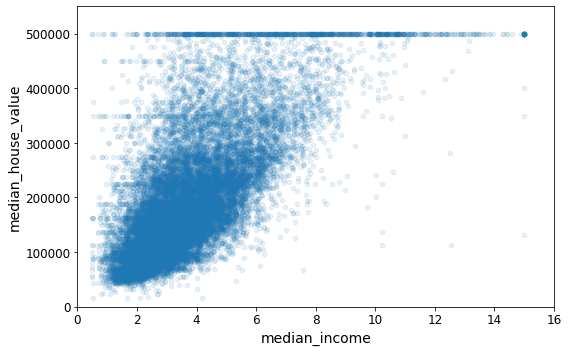

In [ ]:
# do a scatter plot of median house value as a function of median income
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(8,5))
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot_pandas")

#### Geographical Features
As before, when it comes to geographical attributes like `latitude` or `longitude`, we may want to rely on a different visualization. Let us plot the house price information on top of a map of California, with each data point given by a circle whose width captures the district population and whose color captures the house value.

Saving figure california_housing_prices_plot


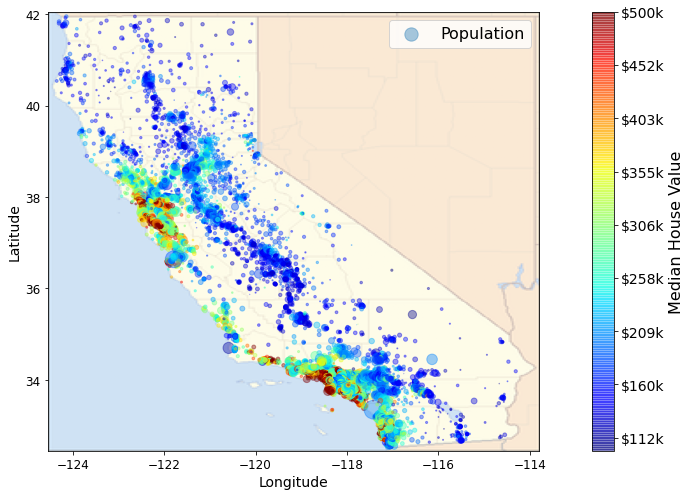

In [ ]:
# visualize the house value as a function of geography and district size
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,7),
               s=data['population']/100, label="Population",
               c="median_house_value", cmap=plt.get_cmap("jet"),
               colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

#### Categorical Features
For categorical features we cannot compute correlation coefficients, but we can rely on visualizations to understand the relationships. The `seaborn` package contains several functions for [plotting with categorial features](https://seaborn.pydata.org/tutorial/categorical.html). For instance, below we show the dependency of our target variable `median_house_value` on the categorical feature `ocean_proximity` through a regular boxplot and through a **boxenplot** that displays more information about each distribution.

Saving figure boxplot_boxenplot_ocean_prox


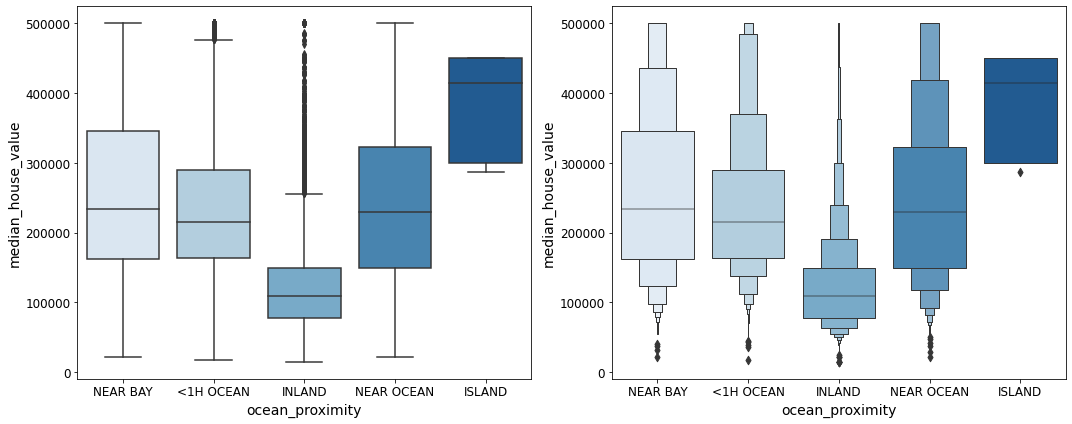

In [ ]:
# ocean_proximity analysis 
plt.figure(figsize=(15,6))  # create a figure of the desired size

plt.subplot(1,2,1)  # a boxplot
sns.boxplot( x=data["ocean_proximity"], y=data["median_house_value"], palette="Blues")

plt.subplot(1,2,2)
sns.boxenplot( x=data["ocean_proximity"], y=data["median_house_value"], palette="Blues")
save_fig("boxplot_boxenplot_ocean_prox")

To explore how other numeric attributes depend on a categorical attribute, we can simply repeat the process above for each attribute we want to consider. The snippet of code below produces boxenplots for all the numeric attributes.

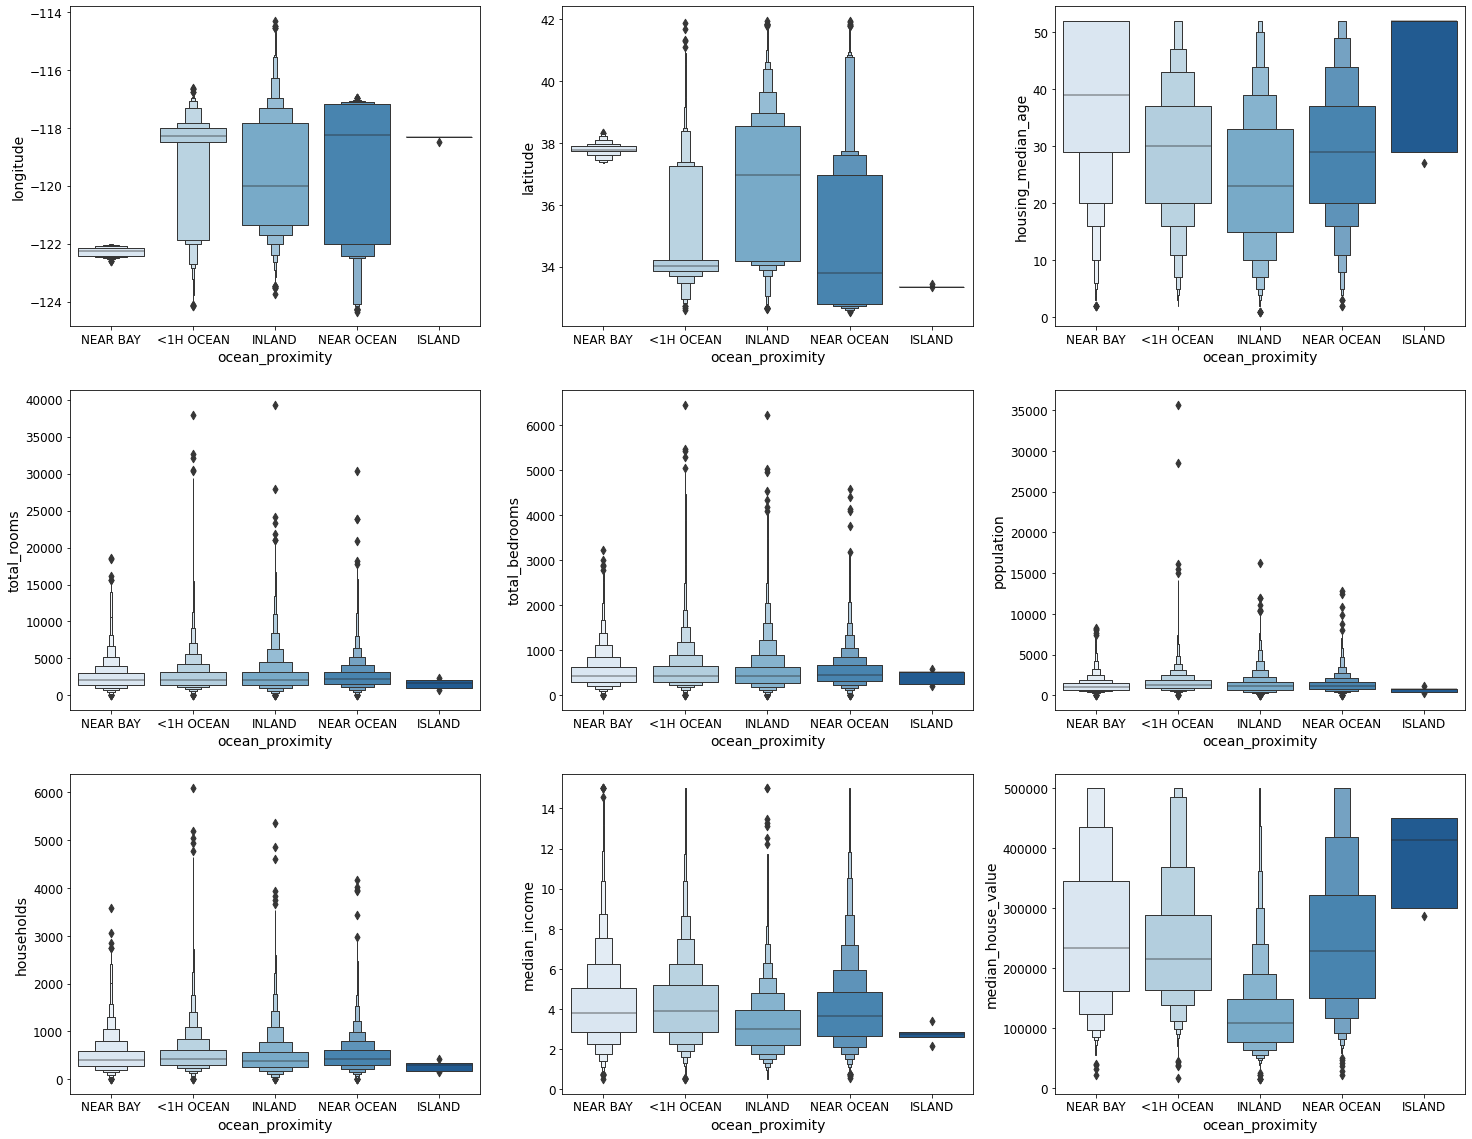

In [ ]:
# boxenplot for each attribute as a function of the categorical feature

which_attributes = list(data.columns)
which_attributes.remove('ocean_proximity')

num_figs = len(which_attributes)
num_columns = 3
num_rows = int(np.ceil(num_figs/num_columns))

plt.figure(figsize=(25,20))  # create a figure of the desired size
for i in range(num_figs):
    plt.subplot(num_rows,num_columns,i+1)
    sns.boxenplot( x=data["ocean_proximity"], y=data[which_attributes[i]], palette="Blues")  # a boxenplot

## Task #2

Use the menus on the left panel of the visualization to change how the data is organized:

1. In the **Binning | X-Axis** menu, select **median_income**, and in the **Binning | Y-Axis** menu, select **median_house_value**. How would you describe the relationship between median income and median house value?

2. Next, in the **Binning | X-Axis** menu, select  **marital_status**, and in the **Color By** and  **Label By** menus, select **gender**. What noteworthy observations can you make about the gender distributions for each marital-status category?

**As you perform the above tasks, keep the following questions in mind:**  
1. **Do you notice any peculiar "pattern" in the relationships?** For instance:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Do certain features exhibit a strong (positive or negative) correlation?
2. **Is the pattern "robust"?** For instance:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Does it depend on the way in which you are visualizing the data?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Does it change depending on the values of one of the features?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Is it different than what you might expect / do you think it represents reality?
3. **Does the pattern have meaningful implications in the given problem context?** For instance:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Could it lead the ML algoritms to over-represent or under-represent something?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Could it generate bias in the predictions?
4. **Would any relationships raise privacy or bias concerns if (some of) the features were used for the prediction task?**

Some of the things you may have noticed:

1. The target `median_house_value` is strongly positively correlated with `median_income` (coefficient 0.69). This is also evidenced in the separate scatter plot, which exhibits a clear upward trend. This means that the `median_income` will likely be a good predictor for the `median_house_value`, which also makes some sense in reality. An important thing to be aware of here is that if we do end up including `median_income`, our model may be exposed to a few potential legal issues:
   * when predicting house value for very small districts, we may be using the median income of just a few households, which can be problematic from a privacy standpoint;
   * the income per district may correlate with particular data (e.g., racial composition) that speaks to protected features, so our ML algorithms may generate home valuations that also correlate with these protected features.  

This does not mean that using `median_income` is illegal or that we should steer clear of the feature, but rather than context is always important, both in terms of the features you are working with and also regarding the intended use of your ML tool.

2. The target is weakly positively correlated with `total_rooms` and `total_bedrooms` (coefficients 0.13 and 0.05, respectively). This probably makes some sense if we expect "larger houses" to command larger median prices, but it is worth remembering that `total_rooms` and `total_bedrooms` are not calculated **per house(hold)**, but rather **per district**. So it becomes less clear whether the relationship should be one of positive or negative correlation (also see our discussion in bullet #4 below). In this case, it would make more sense to consider new features corresponding to **rooms per household**, as those would likely be better predictors of house value. We will actually do this in the next section, where we experiment with feature combinations.<br>
It is also worth noting that `total_rooms` is highly positively correlated with `total_bedrooms`, `population` and `households`, which makes sense given that they are all related to **totals per district**. This strong correlation between predictive features is very undesirable as it can lead to **multi-collinearity** and poor predictive models. Hopefully by defining the new feature **rooms per household**, these correlations would be reduced and our models would improve even further. 

3. The target is weakly positively correlated with `housing_median_age` (coefficient 0.11). This may be slightly unexpected, because one may expect newer constructions to also be more expensive (holding everything else equal). But it is worth considering that in reality, older houses may also be located in more desirable neighborhoods or may have certain design features that newer constructions don't have (e.g., high ceilings, charm), which may push prices higher. Thus, the relationship between age and house value may be mixed. We may want to explore this more closely and define more complex features that interact with other variables.

4. The target is very weakly correlated with `households` and `population` (coefficients 0.07 and -0.02, respectively). The direction of the correlation here may be a bit unclear. On the one hand, one might expect more densely populated areas such as large urban centers to command higher prices; this actually seems to be the case in the map of California that we plotted, where higher prices seem to occur exactly in the areas that correspond to the more densely populated urban centers. However, a larger population **in a district** may not necessarily be correlated with larger house prices (e.g., densely populated neighborhoods may also be dirtier or have a higher crime rate). Additionally, `households` and `population` are also postively correlated among themselves and with other features (`total_rooms` and `total_bedrooms`), so it would probably make sense to consider some other derived features that are better correlated with quality or value (for the house, but also for the district).

5. The target is weakly correlated with `latitude` and `longitude` (correlation coefficients of -0.05 and -0.14, respectively). However, some clear patterns can be observed from the histograms, which exhibit peaks at two particular values of latitude and longitude. Looking at the figure that includes the map makes this more clear: the peaks seem to occur exactly in the areas that correspond to the more densely populated urban centers that we identified earlier, the Bay Area in the North and the Los Angeles/San Diego area in the south. This means that latitude and longitude by themselves may be poor predictors of median house values, but certain features derived from them may be valuable predictors: for instance, we could include a categorical variable capturing proximity to major urban areas. However, note that the location of the two peaks that appear in the scatter plot of `median_house_value` against `latitude` (and `longitude`, respectively) is roughly **the same** for several other features, most notably perhaps for `median_income`, `households` and `population`. This suggests that the information conveyed by the geographical features may already be captured by these other attributes, and introducing new derived features may lead to even more multicollinearity and hurt our model.

6. The ocean proximity seems to matter for the house value: houses that are on an island seem to have higher value than those that are near the bay/ocean, and houses that are `INLAND` seem to have the lowest value. However, this feature is likely very correlated with the geographical information contained in latitude and longitude, which can also be seen in our map figure, so we will have to be mindful about multicollinearity.

<a id="5c"></a>
## C. Experiment with Attribute Combinations - Feature Engineering

The previous analysis gave us a few ideas regarding predictors that might be useful for our target (for instance, `median_income`), but it also suggested a few potential new **derived features** that we may want to explore further. This is a critical step of the ML pipeline that is often referred to as **feature engineering**, and essentially consists of deriving new predictive features by transforming your existing data in order to get increased predictive accuracy and interpretability in your model.

Our previous analysis suggested that the total number of (bed)rooms in a district may not be the most informative feature, and that instead we should consider the number of (bed)rooms per household. Let us create these new features.

In [ ]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]

Now, let us see the impact on the correlation matrix.

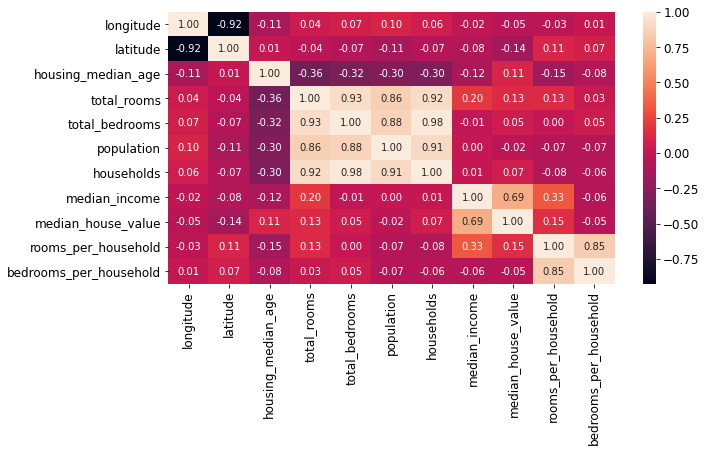

In [ ]:
new_corr_matrix = data.corr()

# visualize the correlation matrix as a heatmap
plt.figure(figsize = (10,5));
sns.heatmap(new_corr_matrix, annot=True, fmt=".2f")

Note that the new feature `rooms_per_household` is more correlated with our target (coefficient 0.15), which suggests that the transformation was a good one. However, the two new variables are quite strongly correlated among themselves (coefficient 0.85); this probably makes sense, as larger houses have more rooms and also more bedrooms. So instead of `bedrooms_per_household`, perhaps we should define a variable like `rooms_per_bedroom` that records a ratio. Let's try this below. 

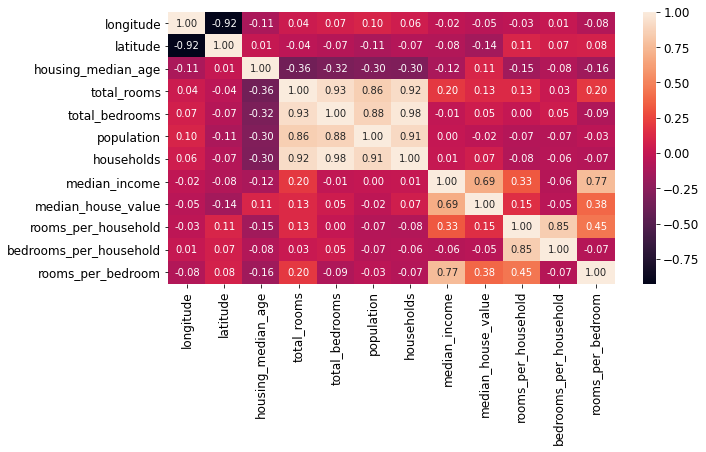

In [ ]:
# define a ratio of rooms per bedroom
data["rooms_per_bedroom"] = data["total_rooms"]/data["total_bedrooms"]

new_corr_matrix = data.corr()
plt.figure(figsize = (10,5));
sns.heatmap(new_corr_matrix, annot=True, fmt=".2f")

The new feature seems to be much more correlated with the `median_house_value` target (correlation coefficient 0.38), but it is also quite correlated with other features such as `median_income` and `rooms_per_household`, so we would have to consider carefully whether it's worth including it in our model.

This round of exploration does not have to be absolutely thorough, as feature engineering is an iterative process by nature: you may want to return to this step even after you test a few ML algorithms, in order to refine the features considered based on your improved understanding of the problem. Speaking more broadly, feature engineering is a critical step in the ML pipeline, and many people (notably, many past winners of Kaggle competitions!) maintain that it is even more important than the particular ML algorithm that you use subsequently. And as the brief analysis above hopefully gave you a sense, the process can be more art than science, as it requires a good understanding of "what makes sense" in the given context.

For now, we remove the exta features that we added so that we only work with the initial dataset subsequently.

In [ ]:
data = data.drop(columns = ["rooms_per_household", "bedrooms_per_household", "rooms_per_bedroom"])

__________
<a id="5"></a>
# 5. Split the Data into a Training Set and a Test Set

The next step is to separate our data into a **training set** and a **test set**. The rationale here is simple: we should use the training set to train and calibrate any ML algorithms we want, but we should then test the performance using a separate test set, which the algorithms have not seen before. This practice is called **out-of-sample testing** or **cross validation**, and it is a **critical** step in evaluating the performance in a responsible fashion, as it provides a more adequate measure of the algorithms' ability to perform well on new data, once your system is launched.

A common choice is to have 80% of the data in the training set and the remaining 20% in the test set. How to do that? Perhaps the first thought that might come to mind is to take the first 80% of the rows/samples as the training set, and the remaining 20% as the test set.

**TASK: Given what you know about our data so far, what could go wrong with the method above?**

### A Simple Random Split

Let's do a simple random split, with 80% of the data for training and 20% for testing. We will use the `Scikit-Learn` package to automate this, and we will set a "seed" for the random number generator (here, the value 42) to ensure that we would get the same train/test split if we repeated the process.

In [ ]:
# split the dataset 80-20
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

Let's have a quick look at the two dataframes.

In [ ]:
train_set.head()

longitude  latitude  ...  median_house_value  ocean_proximity
14196    -117.03     32.71  ...          103,000.00       NEAR OCEAN
8267     -118.16     33.77  ...          382,100.00       NEAR OCEAN
17445    -120.48     34.66  ...          172,600.00       NEAR OCEAN
14265    -117.11     32.69  ...           93,400.00       NEAR OCEAN
2271     -119.80     36.78  ...           96,500.00           INLAND

[5 rows x 10 columns]

In [ ]:
test_set.head()

longitude  latitude  ...  median_house_value  ocean_proximity
20046    -119.01     36.06  ...           47,700.00           INLAND
3024     -119.46     35.14  ...           45,800.00           INLAND
15663    -122.44     37.80  ...          500,001.00         NEAR BAY
20484    -118.72     34.28  ...          218,600.00        <1H OCEAN
9814     -121.93     36.62  ...          278,000.00       NEAR OCEAN

[5 rows x 10 columns]

**Notation**. We may have to refer to the samples/rows that fall in each of these sets. Let us denote by $TRAIN$ and $TEST$ the set of rows in our training and test set, respectively. For instance, in the split above, we would have $TRAIN = \{14196, 8267, 17445, ...\}$ and $TEST = \{20046, 3024, ...\}$.

**TASK. Given what you know so far about our data, is there anything that could go wrong with the simple random split above?**

   - A simple random split generally works well if our dataset is large enough, particularly relative to the number of attributes. But when that's not the case, we run the risk of introducing **sampling bias** (a form of **selection bias**). This means that the training or test set may not adequately represent our full data, and can be a very serious issue in practice. It is there important to avoid it by using **stratified sampling**, which we discuss next.

   - Additionally, we may want to ensure that even if we append new data to our dataset and do a new split (on the bigger dataset), the current training (respectively, test) set continues to be a part of the future training (respectively, test) set. This can be done by creating a unique ID for each data point and using those IDs to decide if a point goes in the training or test set. We omit further details here.

### Being Systematic in Avoiding Sampling Bias -- Stratified Sampling
To understand what this is about, think about running a poll in which you select 1,000 people to ask a specific question. In a well-designed poll, you should ensure that the 1,000 people adequately represent the true demographics. For instance, the proportion of females in your sample is the same as the true proportion of females in the overall population, the proportion across age groups reflects the overall population, etc. This is known as **stratified sampling**: the population is divided into homogenous subgroups (called *strata*), and the right number of instances are sampled from each subgroup to guarantee that the training/test set are representative of the overall population. How we define the strata depends on the context, but generally we want to ensure that the training/test set adequately reflect the distribution of features that are important for predictive purposes.

Let's consider the case of `median_income`, which we know is an important feature in our problem. Since `median_income` has continuous values, we must first create a discrete set of income categories that will represent our strata. Below, we use the `pandas` function [`cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) to create a new data feature called `income_cat` that records whether the median income in a district falls in one of five income categories.

In [ ]:
# create a new feature that records whether the income falls in one of 5 categories
data["income_cat"] = pd.cut(data["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

Let's have a look at the new feature. We will print the first few rows, count the values and plot a histogram.

In [ ]:
data.head()

longitude  latitude  ...  ocean_proximity  income_cat
0    -122.23     37.88  ...         NEAR BAY           5
1    -122.22     37.86  ...         NEAR BAY           5
2    -122.24     37.85  ...         NEAR BAY           5
3    -122.25     37.85  ...         NEAR BAY           4
4    -122.25     37.85  ...         NEAR BAY           3

[5 rows x 11 columns]

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64


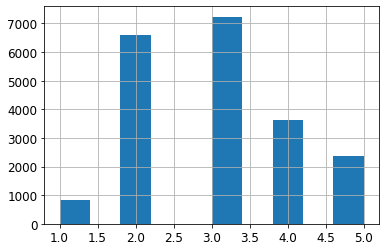

In [ ]:
# count the number of districts falling in each category
print(data["income_cat"].value_counts())

# do a histogram
data["income_cat"].hist()

Let us repeat the original **random sampling** procedure. Note that we are again using the seed of 42, so we should get identical train/test sets as above, but these will now also include the `income_cat` feature. (If you want, feel free to print the first few rows with `head()` and check!)

In [ ]:
# a simple random sampling
random_train_set, random_test_set = train_test_split(data, test_size=0.2, random_state=42)

Now we can use `Scikit-Learn` to do **stratified sampling** based on the income category that we just created.

In [ ]:
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

Let's compare the two methods above for obtaining training/test sets to see which is more precise at capturing the proportions of income categories that exist in our original dataset. Below, the columns named `Overall`, `Random` and `Stratified` correspond to the proportions in the overall dataset and in the training set obtained from the random sampling and the stratified sampling procedures, respectively.

In [ ]:
# create a dataframe with columns recording the proportion of income categories in the three datasets  
compare_props = pd.DataFrame({
    "Overall": data["income_cat"].value_counts() / len(data),
    "Random": random_test_set["income_cat"].value_counts() / len(random_test_set),
    "Stratified": strat_test_set["income_cat"].value_counts() / len(strat_test_set)
}).sort_index()
compare_props["% Error Random"] = 100 * (compare_props["Random"] / compare_props["Overall"] - 1)
compare_props["% Error Stratified"] = 100 * (compare_props["Stratified"] / compare_props["Overall"] - 1)

compare_props  # print this out

Overall  Random  Stratified  % Error Random  % Error Stratified
1     0.04    0.04        0.04            0.97               -0.24
2     0.32    0.32        0.32            1.73               -0.02
3     0.35    0.36        0.35            2.27               -0.01
4     0.18    0.17        0.18           -5.06                0.03
5     0.11    0.11        0.11           -4.32                0.13

As you can see above, the error from randomized sampling can be quite large, particularly for certain income categories like 4 and 5. Stratified sampling produces a training set with proportions that are much closer to the original dataset, and helps avoid potential sampling biases.

To conclude our brief discussion, it is also worth noting that sampling bias may also occur in terms of missing data: when our dataset has missing values, we would want to make sure that both the training and the test set have missing data in proportions that match those in the entire dataset. Let's see how the random and stratified split were performing from this point of view.

In [ ]:
# calculate the percent of missing entries in the random split
print("The original data has {:.2f}% missing entries in the total_bedrooms column."\
      .format( 100 * data["total_bedrooms"].isnull().sum() / len(data)))
print("The random split train set has {:.2f}% missing entries in the total_bedrooms column."\
      .format( 100 * train_set["total_bedrooms"].isnull().sum() / len(train_set)))
print("The stratified train set has {:.2f}% missing entries in the total_bedrooms column."\
      .format(100 * strat_train_set["total_bedrooms"].isnull().sum() / len(strat_train_set)))

The original data has 1.00% missing entries in the total_bedrooms column.


NameError: ignored

As it happens, the random split with a seed of 42 was an **extremely poor** representation of the missing values: the training set had **no** data with missing entries (i.e., all missing rows were placed in the test set!) As a side note, the split of 42 was not chosen adversarially here; we simply followed the same choice as Aurelien Geron, but by pure chance this results in a very bad split of missing records. Note that the same seed results in a better split for the stratified set, where the proportion is a lot closer to the original set. However, this was pure luck, as we did not correct for the issue explicitly. In practice, it would be better to explicitly check for this by creating a strata based on the missing entries as well.

<font color=red>BALANCE SAMPLING BIAS WITH SNOOPING BIAS.</font> Although stratified sampling has some important advantages over purely random sampling, it also poses a potentially serious pitfall: it may introduce a certain degree of "data snooping" bias, because we are using the entire dataset (and in particular, the test set) when figuring our what are the important strata and judging the training/test sets. In practice it is important to not "overdo" this, and to remember that there should be a balance between sampling and snooping bias.


Going forward, we will keep using the stratified training and test sets, so we can re-assign the variable names to make it easier to read, and we will also drop the new feature `income_cat` from all of the data sets, as it is no longer needed.

In [ ]:
# rename the variables
train_set = strat_train_set
test_set = strat_test_set

# drop the new category from the original dataset, the train set and the test set
for set_ in (train_set, test_set, data):
    set_.drop("income_cat", axis=1, inplace=True)

______________
# 4. (?) Preparing the Data for ML Algorithms

The next step is to prepare our data to ensure it is compatible with Machine Learning models. This includes several typical steps such as:
  * **data cleaning** (dealing with missing or incorrect entries, removing outliers, etc.)
  * **handling text and categorical variables** (transforming them into a numeric representation)
  * **feature scaling** (re-scaling some of the numeric features to ensure numeric stability).

We must apply all of the steps to both the training and test set. We start with the former. Let's first separate our stratified training set into one dataset for all the predictor variables (i.e., features), and another one for the output variable/label (`median_house_value`).

The snippet of code below does all of the transformations needed. You can simply run it and move to the next section, but if you are interested in the nuts-and-bolts and a deeper understanding of the steps, continue reading this section.

### A Simple Pipeline

##### Data cleaning: set missing values of 'total_bedrooms' to the median

In [ ]:
train_set[train_set["total_bedrooms"].isnull()]

longitude  latitude  ...  median_house_value  ocean_proximity
4629     -118.30     34.07  ...          175,000.00        <1H OCEAN
6068     -117.86     34.01  ...          264,400.00        <1H OCEAN
17923    -121.97     37.35  ...          287,100.00        <1H OCEAN
13656    -117.30     34.05  ...           95,800.00           INLAND
19252    -122.79     38.48  ...          191,000.00        <1H OCEAN
...          ...       ...  ...                 ...              ...
3376     -118.28     34.25  ...          162,100.00        <1H OCEAN
4691     -118.37     34.07  ...          405,600.00        <1H OCEAN
6052     -117.76     34.04  ...          115,800.00           INLAND
17198    -119.75     34.45  ...          263,800.00       NEAR OCEAN
4738     -118.38     34.05  ...          333,600.00        <1H OCEAN

[158 rows x 10 columns]

Replace all missing values with the median calculated from <font color=red>the training set</font>.

In [ ]:
# replace all missing values with the median from the training set
median_val = train_set["total_bedrooms"].median()             # calculate median from the training set
train_set["total_bedrooms"].fillna(median_val, inplace=True)  # replace all missing values in training set
test_set["total_bedrooms"].fillna(median_val, inplace=True)    # ... and test set

In [ ]:
print("Here is the value in the training set at index 4629: ",train_set.loc[4629,"total_bedrooms"])

# check that there are no more missing values
train_set[train_set["total_bedrooms"].isnull()]

Here is the value in the training set at index 4629:  433.0


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

##### Handling text and categorical variables : transform `ocean_proximity` into binary "dummy" variables

In [ ]:
# transform categorical feature
pd.get_dummies(train_set["ocean_proximity"])

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
17606          1       0       0         0           0
18632          1       0       0         0           0
14650          0       0       0         0           1
3230           0       1       0         0           0
3555           1       0       0         0           0
...          ...     ...     ...       ...         ...
6563           0       1       0         0           0
12053          0       1       0         0           0
13908          0       1       0         0           0
11159          1       0       0         0           0
15775          0       0       0         1           0

[16512 rows x 5 columns]

In [ ]:
# add dummy variables for "ocean_proximity" to both training and test sets 
train_set = train_set.join(pd.get_dummies(train_set["ocean_proximity"]))
test_set = test_set.join(pd.get_dummies(test_set["ocean_proximity"]))

# remove the original categorical 'ocean_proximity' feature, as it's no longer needed
train_set = train_set.drop(columns=["ocean_proximity"])
test_set = test_set.drop(columns=["ocean_proximity"])

In [ ]:
train_set

longitude  latitude  housing_median_age  ...  ISLAND  NEAR BAY  NEAR OCEAN
17606    -121.89     37.29               38.00  ...       0         0           0
18632    -121.93     37.05               14.00  ...       0         0           0
14650    -117.20     32.77               31.00  ...       0         0           1
3230     -119.61     36.31               25.00  ...       0         0           0
3555     -118.59     34.23               17.00  ...       0         0           0
...          ...       ...                 ...  ...     ...       ...         ...
6563     -118.13     34.20               46.00  ...       0         0           0
12053    -117.56     33.88               40.00  ...       0         0           0
13908    -116.40     34.09                9.00  ...       0         0           0
11159    -118.01     33.82               31.00  ...       0         0           0
15775    -122.45     37.77               52.00  ...       0         1           0

[16512 rows x 14 columns]

In [ ]:
# FINALIZE TRAIN AND TEST DATA
X_train = train_set.drop("median_house_value", axis=1)  # drop the target for the training set    
y_train = train_set["median_house_value"]

X_test = test_set.drop("median_house_value", axis=1)  # drop the target for the test set 
y_test = test_set["median_house_value"]

##### Scaling / Normalizing the data
Very important in practice, but we skip it here.

## 4. Training a Machine Learning Model

### Define some functions to help assess performance of any model on a specific dataset

In [ ]:
# calculate metrics
def calculate_performance_metrics(label_dataset, y_true, y_pred):

    print("Results in the {} Set:".format(label_dataset))
    # Regression metrics
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    #explained_variance=metrics.explained_variance_score(y_true, y_pred)
    #r2=metrics.r2_score(y_true, y_pred)

    #print('explained_variance: ', round(explained_variance,4))
    print('MSE:       ', round(mse,4))
    print('RMSE:      ', round(np.sqrt(mse),4))
    print('MAE:       ', round(mean_absolute_error,4))

In [ ]:
# a function to visualize errors in a specific set (training or testing)
def visualize_errors(dataset, errors, X_values, which_features):

    # calculate how many figures are needed
    num_figs = len(which_features)
    num_columns = 3
    num_rows = int(np.ceil(num_figs/num_columns))

    # one large figure with a common title
    fig = plt.figure(figsize=(10*num_columns,5*num_rows))

    for i in range(num_figs):
        plt.subplot(num_rows,num_columns,i+1) 
        sns.scatterplot( x=X_values.loc[:,which_features[i]], y=errors, 
                        palette="Blues").set(xlabel=X_values.columns[i], ylabel="error = y_true - y_predicted")  # a scatterplot
    
    fig.suptitle("Errors in the {} Set".format(dataset), fontsize=30)
    plt.show()

In [ ]:
# a function to visualize errors and partial dependence plots in a specific set (training or testing)
def visualize_performance_orig(dataset, our_model, X_values, y_true):

    from sklearn.inspection import plot_partial_dependence
    
    errors = y_true - our_model.predict(X_values)  # calculate errors
    
    # calculate how many figures are needed
    # for each feature, we will do a scatter plot of errors and a partial dependence plot
    num_rows = len(X_values.columns)

    # one large figure with a common title
    fig = plt.figure(figsize=(20,5*num_rows))

    for i in range(num_rows):
        
        # scatter plot of the error (as a function of the feature)
        plt.subplot(num_rows,2,i*2+1)
        sns.scatterplot( x=X_values.iloc[:,i], y=errors, 
                        palette="Blues").set(xlabel=X_values.columns[i], ylabel="error = y_true - y_pred")  # a scatterplot

        # do a partial dependence plot of the predicted value (as a function of the feature)
        cf = plt.subplot(num_rows,2,i*2+2)
        plot_partial_dependence(estimator=our_model, X=X_values, features=[i], ax=cf)
        ax_ = plt.gca()
        ax_.set_ylabel('Mean of y predicted')

        
    fig.suptitle("Scatter plots of errors and partial dependence plots in the {} Set".format(dataset), fontsize=22)
    plt.show()

In [ ]:
# a function to visualize errors and partial dependence plots in a specific set (training or testing)
def partial_dependence_plots(dataset, our_model, X_values, y_true, which_features):

    from sklearn.inspection import plot_partial_dependence
    
    # calculate how many figures are needed
    num_figs = len(which_features)
    num_columns = 3
    num_rows = int(np.ceil(num_figs/num_columns))
    
    # one large figure with a common title
    fig = plt.figure(figsize=(10*num_columns,5*num_rows))
    
    for i in range(num_figs):
        
        # do a partial dependence plot of the predicted value (as a function of the feature)
        cf = plt.subplot(num_rows,num_columns,i+1)
        plot_partial_dependence(estimator=our_model, X=X_values, features=[which_features[i]], ax=cf)
        ax_ = plt.gca()
        ax_.set_ylabel('Mean of y pred')
    
    fig.suptitle("Partial dependence plots in the {} Set".format(dataset), fontsize=22)
    plt.show()

### A White Box Model: A Decision (Regression) Tree

Let us train our first model: a Decision Tree. Since in our case, we are trying to predict a continuous variable (`median_household_income`), we are actually dealing with a **Regression Tree**. <font color=red> **INSERT A QUICK DOCUMENT HERE WITH OVERVIEW OF DECISION TREE</font>

To implement our regression tree, we will use [SciKit Learn's `DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) functionality.

In [ ]:
# train a Regression Tree
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=123)

tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

Note that we are specifiying several arguments when creating our Regression Tree model above: 
  - `criterion` refers to how the goodness of fit is evaluated  
    - `mse` means that the tree will use **"mean squared error"** when calculating the prediction errors.  
    To understand exactly what this is, suppose that we denote by $\hat{y}_i$ the estimated median house value that our ML model produces for sample $i$. Using `mse` means that the ML model (in this case, our tree) is constructed so that the values $\hat{y}_i$ minimize the quantity: $\frac{1}{|TRAIN|}\sum_{i \in TRAIN} (y_i - \hat{y}_i)^2$. `mse` is the default option, and is the most common option for goodness of fit with continuous targets.
    - another possible option is `mae`, which stands for the **"mean absolute error"** $\frac{1}{|TRAIN|}\sum_{i \in TRAIN} | y_i - \hat{y}_i |$
  - `max_depth` controls how deep we are allowing the tree to become. Here, we use `None`, which means the tree can grow to **any depth**. We will actually return to this parameter later, to see its impact.
  - `random_state` allows us to seed the random number generator so that we always get the same tree if we repeat the process.
  
In addition to these, there are several other arguments that we can set, but we will not discuss them here for simplicity (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) for more details).

## Visualize the Tree
Let's actually visualize the tree, which will make the concepts above a lot more clear. We will use the [`plot_tree` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) that is built into SciKitLearn.

Saving figure initial_decision_tree


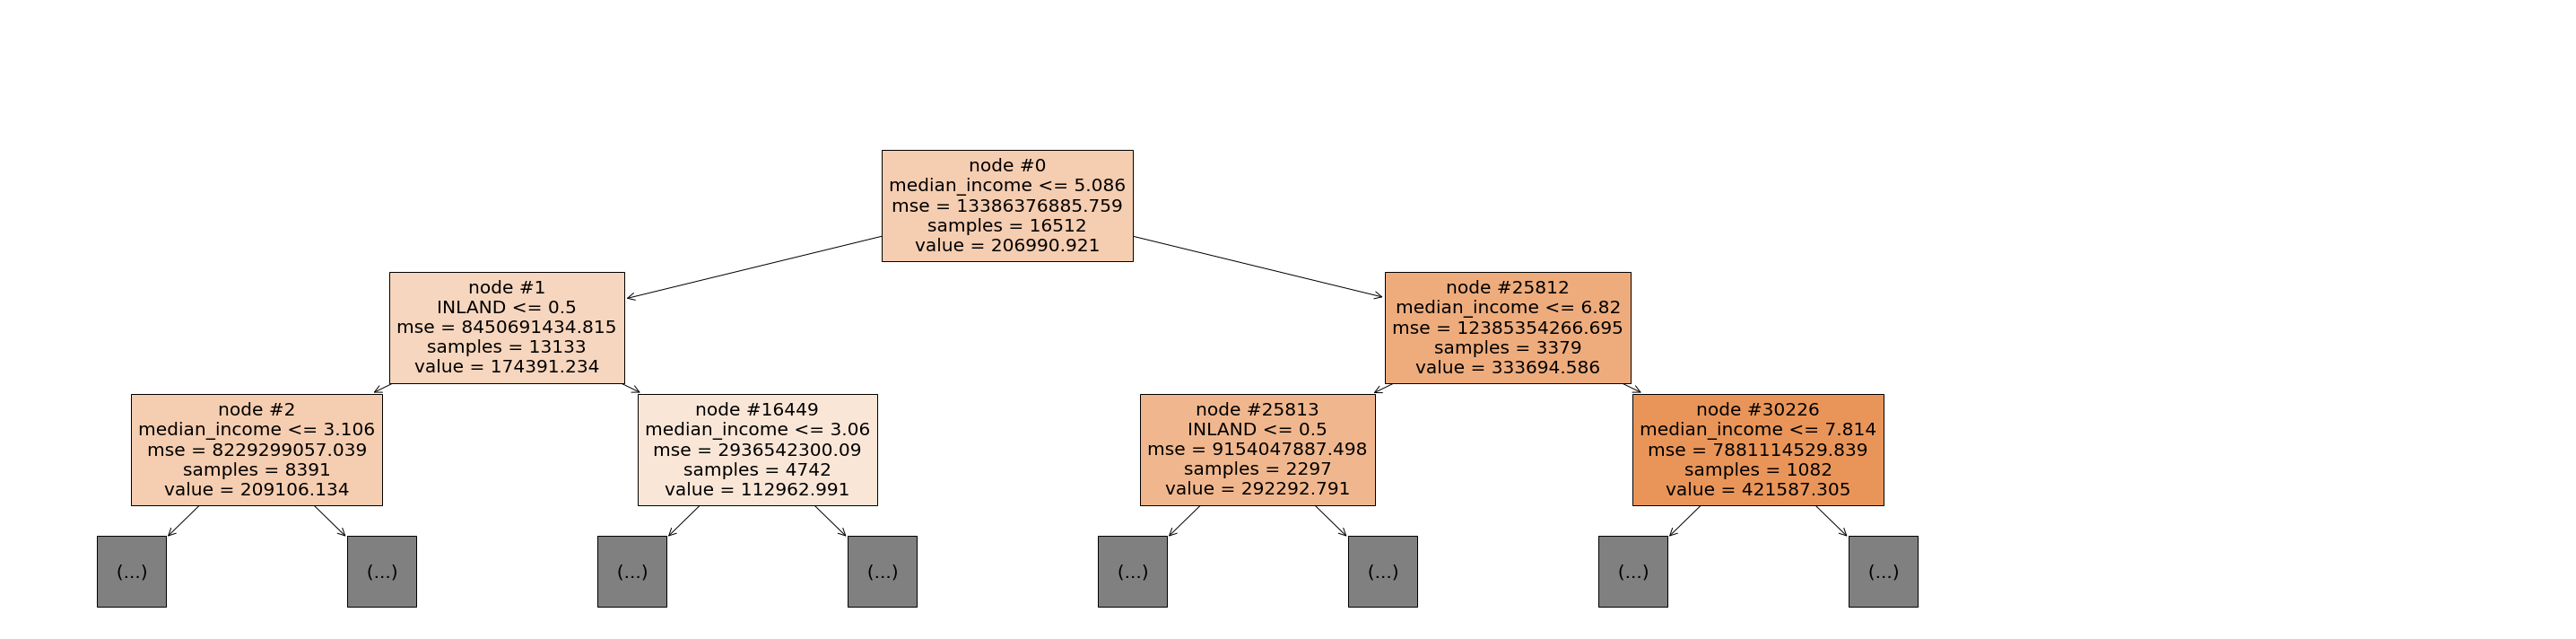

In [ ]:
# Visualize the tree. Recall that LEFT=TRUE, RIGHT=FALSE
from sklearn import tree

plt.figure(figsize=(40,10))
tree.plot_tree(tree_model, max_depth=2, feature_names=X_train.columns, class_names=None,
               label='all', filled=True, impurity=True, node_ids=True, proportion=False, fontsize=None)

save_fig("initial_decision_tree")

When interpreting the tree above, the main thing to note is the logical condition in each node. This is the **split condition**, and it always involves one of the features in our model. The two subtrees correspond to the two possible outcomes: **the left subtree for the condition being true**, and the **right subtree for the condition being false**.<br>
*For instance, the condition in the root node (i.e., node #0) is `median_income <= 5.086`, and the left subtree corresponds to all the training samples that satisfy this condition, whereas the right subtree corresponds to all training samples that have `median_income > 5.086`.*

**When the tree is estimated/fitted**, the ML algorithm determines which feature to use at each node and how to do the split, and its goal in doing this is to reduce the MSE (mean-squared-error) in the entire training set.

**Predictions** for a new data point are done by following all the conditions until a final leaf is reached, and taking the average of the target variable for all the samples in that leaf node.

**TASK: Explore the tree above and make sure you understand how it works.** For instance:
  - Try to interpret the conditions in each node
  - We are creating the visualization using a few parameters for `plot_tree`. Feel free to play with these and see how it changes the visualization above.  <br><font color=red>REMARK and WARNING.</font> The `max_depth` parameter that we used in the `plot_tree` function controls how many levels of the tree are plotted, and **is different from the `max_depth` that we may have used when constructing the tree**! If you want to see the entire tree, you should set the value of `max_depth` to `None` (or omit it) when calling `plot_tree`. However, this may fail to display something meaningful when the tree is very large!

## Evaluate Your Model

Of course, the main question that probably comes to mind now is **how "good" is this model**? There are many dimensions to this question, but a bare minimum of things to look at are:
1. **What is the predictive accuracy?** Specifically,   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; How well is it predicting in the **training set**? (Is it good at fitting the data it was trained on...)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Is it working "well" under other performance metrics? (Calculate a few different metrics of accuracy, such as MSE, MAE, etc.)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  How well is it predicting in the **test set**? (Is it good at predicting for **new** data, on which it hasn't been "trained"...)
2. **Is the model predicting "uniformly well" in our data?** For instance,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Does the quality of the prediction depend on certain feature values?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Is there a bias for certain features?
3. **How interpretable/explainable is the model?** For instance,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Can we understand and interpret the model?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Do we understand **why** certain predictions are produced?

### Predictive accuracy in the training set
First of all, let's try to predict the median house value for the **first 5 samples** in our training dataset. Let's display them below.

In [ ]:
# display the first 5 samples
X_train.head(5)

longitude  latitude  housing_median_age  ...  ISLAND  NEAR BAY  NEAR OCEAN
17606    -121.89     37.29               38.00  ...       0         0           0
18632    -121.93     37.05               14.00  ...       0         0           0
14650    -117.20     32.77               31.00  ...       0         0           1
3230     -119.61     36.31               25.00  ...       0         0           0
3555     -118.59     34.23               17.00  ...       0         0           0

[5 rows x 13 columns]

Determining the predicted median house value ($\hat{y}_i$) for each of the samples is very simple: we can use the `predict` function of the model we trained.

In [ ]:
# predict for the first few samples in the training set
tree_model.predict(X_train.head(5))

array([286600., 340600., 196900.,  46300., 254500.])

And now, let's compare the predictions with the true values $y_i$ of the median house in those districts.

In [ ]:
# print the true values
y_train.head(5)

17606   286,600.00
18632   340,600.00
14650   196,900.00
3230     46,300.00
3555    254,500.00
Name: median_house_value, dtype: float64

That looks amazing! Our tree is able to exactly fit the values! But maybe we just got lucky with the first 5 samples...

### Evaluate a few different performance metrics
Let's calculate the errors in the **entire training set**, and use the helper functions that we defined to display a few error metrics such as MSE, RMSE (root mean squared error) and MAE.

In [ ]:
# calculate predictions and errors in the entire training set
y_hat_train = tree_model.predict(X_train)
errors_train = y_train - y_hat_train

# calculate performance metrics 
calculate_performance_metrics("Training", y_train, y_hat_train)

Results in the Training Set:
MSE:        0.0
RMSE:       0.0
MAE:        0.0


### Predictive accuracy in the test set

A critical step of the evaluation process is to determine performance in the **test set**, which contains data that the ML algorithm has not seen before. Let's predict for all the samples in the test set, and calculate the errors metrics.

In [ ]:
# calculate predictions and errors in the TEST set
y_hat_test = tree_model.predict(X_test)
errors_test = y_test - y_hat_test

# calculate performance metrics 
calculate_performance_metrics("Testing", y_test, y_hat_test)

Results in the Testing Set:
MSE:        4668916585.4583
RMSE:       68329.4708
MAE:        43295.8508


If you are observing a big degradation in performance when going from the training to the test set, it is because the ML model was likely **overfitting** the training data. Loosely speaking, overfitting occurs when the model has a lot of degrees of freedom and it uses these to perfectly match the training set. This also implies that the model ends up fitting a lot of the noise in the training data, so it fails to perform well on new data (such as in the test set). 

### Is the model predicting "uniformly well"?
It is important to understand if the predictive accuracy changes with the feature values. Let's use our helper function to do scatter plots of the error terms $(y_i - \hat{y}_i)$ in our training set, as a function of the features.

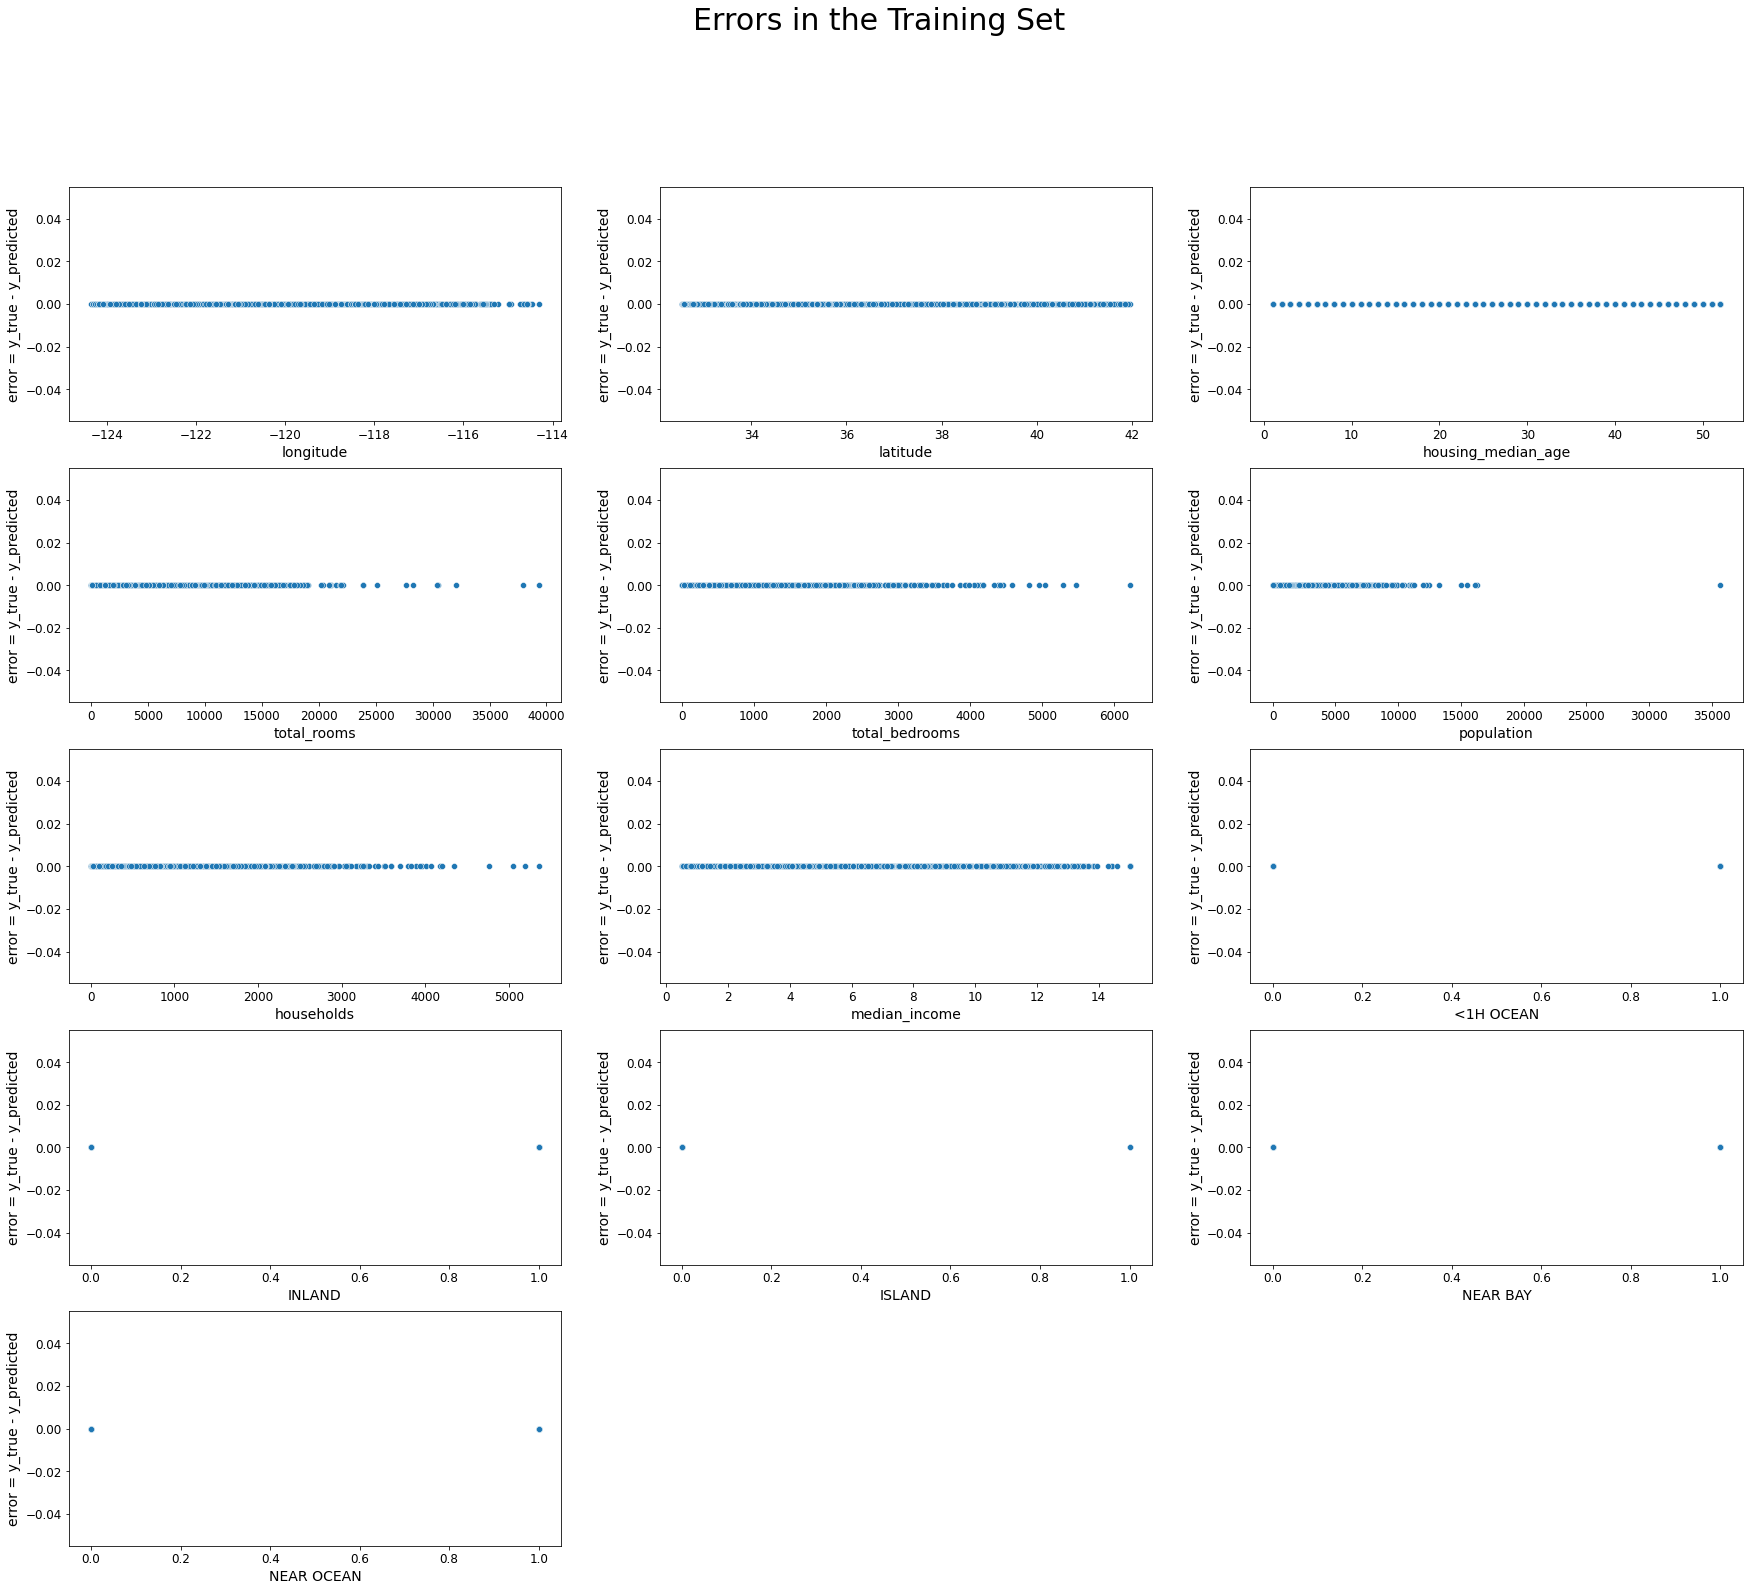

In [ ]:
# let's visualize the predictive performance as a function of the features
features_to_plot = X_train.columns   # select all the features

visualize_errors("Training", errors_train, X_train, features_to_plot)
#visualize_performance("Training", tree_model, X_train, y_train, ['latitude'])

This step is important for several reasons:
   - it can allow you to detect if the errors have a certain pattern, which may inform the design of better features to use when training
   - it can enable you to detect iif your ML algorithm exhibits some form of bias, such as predicting better for certain categories than others.
   
We will return to these points in a future class, where we examine issues of bias and fairness in detail.

**TASK. Go back to the step where we initially created our decision tree and change the `max_depth` parameter, and repeat the various steps above. What do you observe?** Some things to look out for:
1. **How does the predictive accuracy change with `max_depth`?**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What happens to the errors in the training set?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What about the errors in the test set?
2. **How does the overall decision tree change?**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Do the same features remain important?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Do the splits change?

### Model Complexity and Overfitting
Let us systematically change the `max_depth` parameter, train a decision tree, and record its predictive accuracy in both the training and the test set.

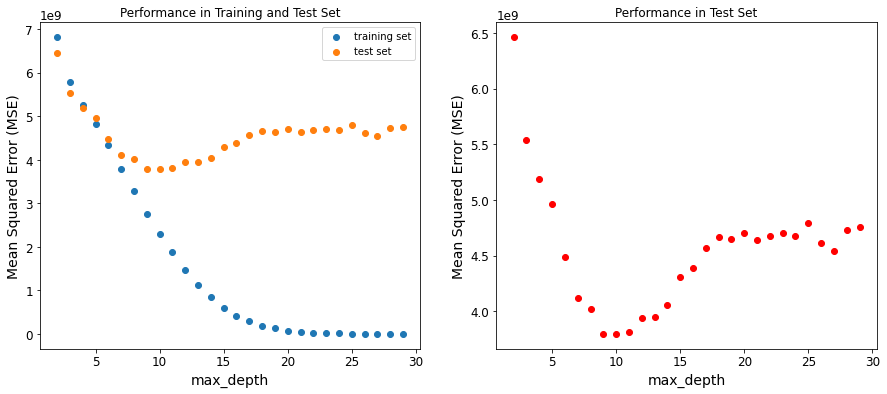

In [ ]:
# we will try a few different values for max_depth; here, we try all values from 2 to 30
max_depth_values = np.arange(2,30,1)
training_performance = np.zeros(len(max_depth_values))
test_performance = np.zeros(len(max_depth_values))

for i in range(len(max_depth_values)):
    # train a new decision tree model with max_depth = i
    new_tree_model = DecisionTreeRegressor(criterion='mse', max_depth=max_depth_values[i], random_state=123)
    new_tree_model.fit(X_train, y_train)
    
    # record the MSE in training and test set
    training_performance[i] = metrics.mean_squared_error(y_train, new_tree_model.predict(X_train))
    test_performance[i] = metrics.mean_squared_error(y_test, new_tree_model.predict(X_test))

# plot the performance as a function of max_depth
fig = plt.figure(figsize=(15,6))  # create a figure of the desired size

plt.subplot(1,2,1)
plt.scatter(x=max_depth_values, y=training_performance, label="training set")   # a simple scatter plot
plt.scatter(x=max_depth_values, y=test_performance, label="test set")   # a simple scatter plot
plt.xlabel("max_depth")
plt.ylabel("Mean Squared Error (MSE)")
plt.title( "Performance in Training and Test Set")
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("max_depth")
plt.title( "Performance in Test Set")
plt.scatter(x=max_depth_values, y=test_performance, label="test set", color='red')         # a simple scatter plot
plt.show()

**Q: What do you see in the plots above? What tree depth would you want to choose?**

There is a trade-off between the maximum tree depth and the performance. As we increase the depth, the algorithm performs better and better in the training set, until it eventually fits perfectly the data (at depths above 25 or so). In the test there however, there is initially improvement, but eventually the errors increase and eventually stabilize. In simple terms, what we are seeing is overfitting in action: as the tree becomes more complex, it fits the training data perfectly, but it stops being able to generalize. If we want our tree to work well on new data, we should pick a tree depth somewhere between 8 and 10. If you are wondering how one could proceed about finding this value in a systematic way, see our final section on **Limitations and Topics Left Out**.

We conclude with a brief discussion of the pros and cons of Decision Trees: 
<p style="color:green;">Advantages of Decision Trees: </p>

1. (Small) Decision Trees are easy to explain to a non-expert (some believe even easier than linear regression!), and their predictive mechanism is easy to interpret and transparent, and can be displayed graphically.
2. Some experts maintain that decision trees more closely mirror human decision-making than other (more complex) approaches, for instance due to their lexicographic nature, which makes the prioritization of features explicit.

<p style="color:red;">Disadvantages of Decision Trees: </p>

1. Trees generally do not have the same level of predictive accuracy as more complex regression and classification approaches (e.g., random forests, boosted trees, neural networks).
2. Trees can be non-robust, e.g., a small change in the data can cause a large change in the final estimated tree. However, by aggregating many decision trees the predictive performance of trees can be substantially improved, and this is the key idea behind some of the best ML methods in practice, such as random forests and boosted trees.

# 5. Interpreting / Explaining the Model

The final discussion above brings up the last important topic, which is related to **understanding the ML model**. The critical questions hare are:
1. **How interpretable/explainable is the model?**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Can we understand and interpret the model?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Do we understand **why** certain predictions are produced?
2. **How to trade off between predictive accuracy and interpretability?**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; More complex models tend to have better predictive accuracy...
3. 

As we mentioned above, Decision Trees are a so-called **white-box** model, meaning that they are actually quite interpretable: a simple visualization is possible that will actually make the predictive algorithm (induced by the ML) to be fully transparent. Similarly, linear regression models are also considered **white box**, as having access to the coefficients of the regression allows to immediately understand how predictions are made.

More complex models like random forests, gradient boosted trees, support vector machines, or neural networks are unfortunately significantly more **black-box**, and such a simple "interpretability" is not possible. But even in these cases, one can try to get more transparency into the workings of the ML algorithms through a smart visualizations and by using certain advanced packages that quantify feature importance. We discuss a few of these below.

### Let Us Train a Black-Box Model: Random Forest
Random Forests were invented by Leo Breiman, and are based on a simple but powerful idea: instead of training a single tree, let's train an **ensemble** of trees, and take our prediction by averaging the predictions of all the trees in the ensemble. Of course, there are some smart tweaks that turn this simple idea into a very powerful algorithm: each tree in the ensemble is built using a bootstrapped set of training samples, and each split in these tree only considers a **random sample of $m$ features as split candidates from the full set of features**. For a more detailed explanation, check out [this Youtube video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer).

Let's train a random forest regressor for our task.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

Let's evaluate the quality of the prediction in the training and test set.

In [ ]:
# training set
y_train_pred_rf = rf_model.predict(X_train)
calculate_performance_metrics("Training", y_true=y_train, y_pred=y_train_pred_rf)

# testing set
y_test_pred_rf = rf_model.predict(X_test)
calculate_performance_metrics("Test", y_true=y_test, y_pred=y_test_pred_rf)

Results in the Training Set:
MSE:        354416019.7817
RMSE:       18825.9401
MAE:        12038.488
Results in the Test Set:
MSE:        2258800300.4765
RMSE:       47526.8377
MAE:        31199.5257


#### Partial Dependence Plots
The first step towards understanding your model is to do a set of **partial dependence plots**. More formally, these plots depict the value of the prediction $\hat{y}$ (i.e., the predicted `median_house_value`) as a function of one feature at a time, taking an average over all the other features. Let's see this in action.

KeyboardInterrupt: ignored

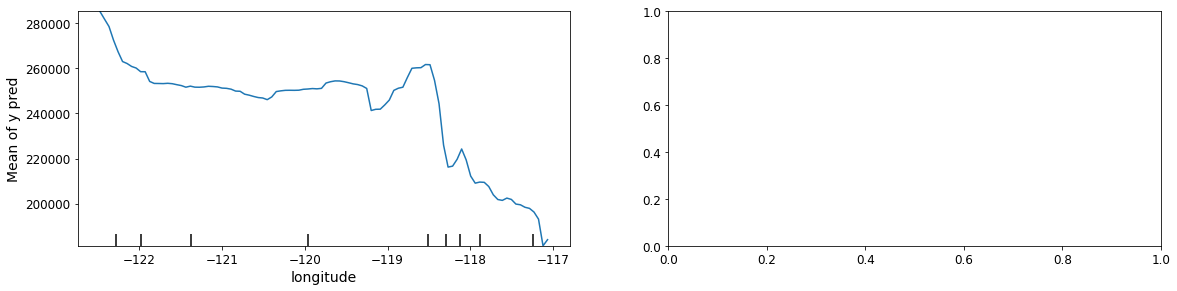

In [ ]:
# partial dependence plots training set
partial_dependence_plots("Training", rf_model, X_train, y_train, X_train.columns)

You may worry that this is done in the training set, so you can also repeat this exercise using the test set.

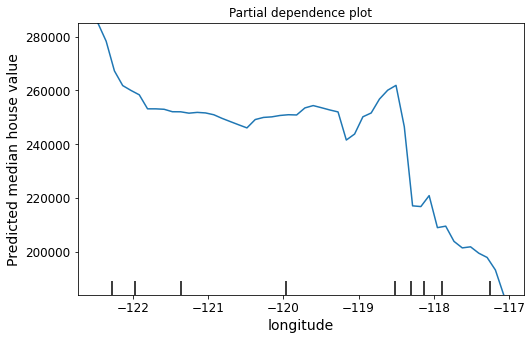

In [ ]:
feature = 'longitude' #@param ['', 'longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', \'ISLAND', 'NEAR BAY', 'NEAR OCEAN'] {allow-input: true}

from sklearn.inspection import plot_partial_dependence

new_fig = plt.figure(figsize=(8,5))
plot_partial_dependence(estimator=rf_model, X=X_train, features=[feature],\
                        grid_resolution = 50, fig=new_fig)
ax_ = plt.gca()
ax_.set_ylabel('Predicted median house value')
ax_.set_title("Partial dependence plot")
plt.show()

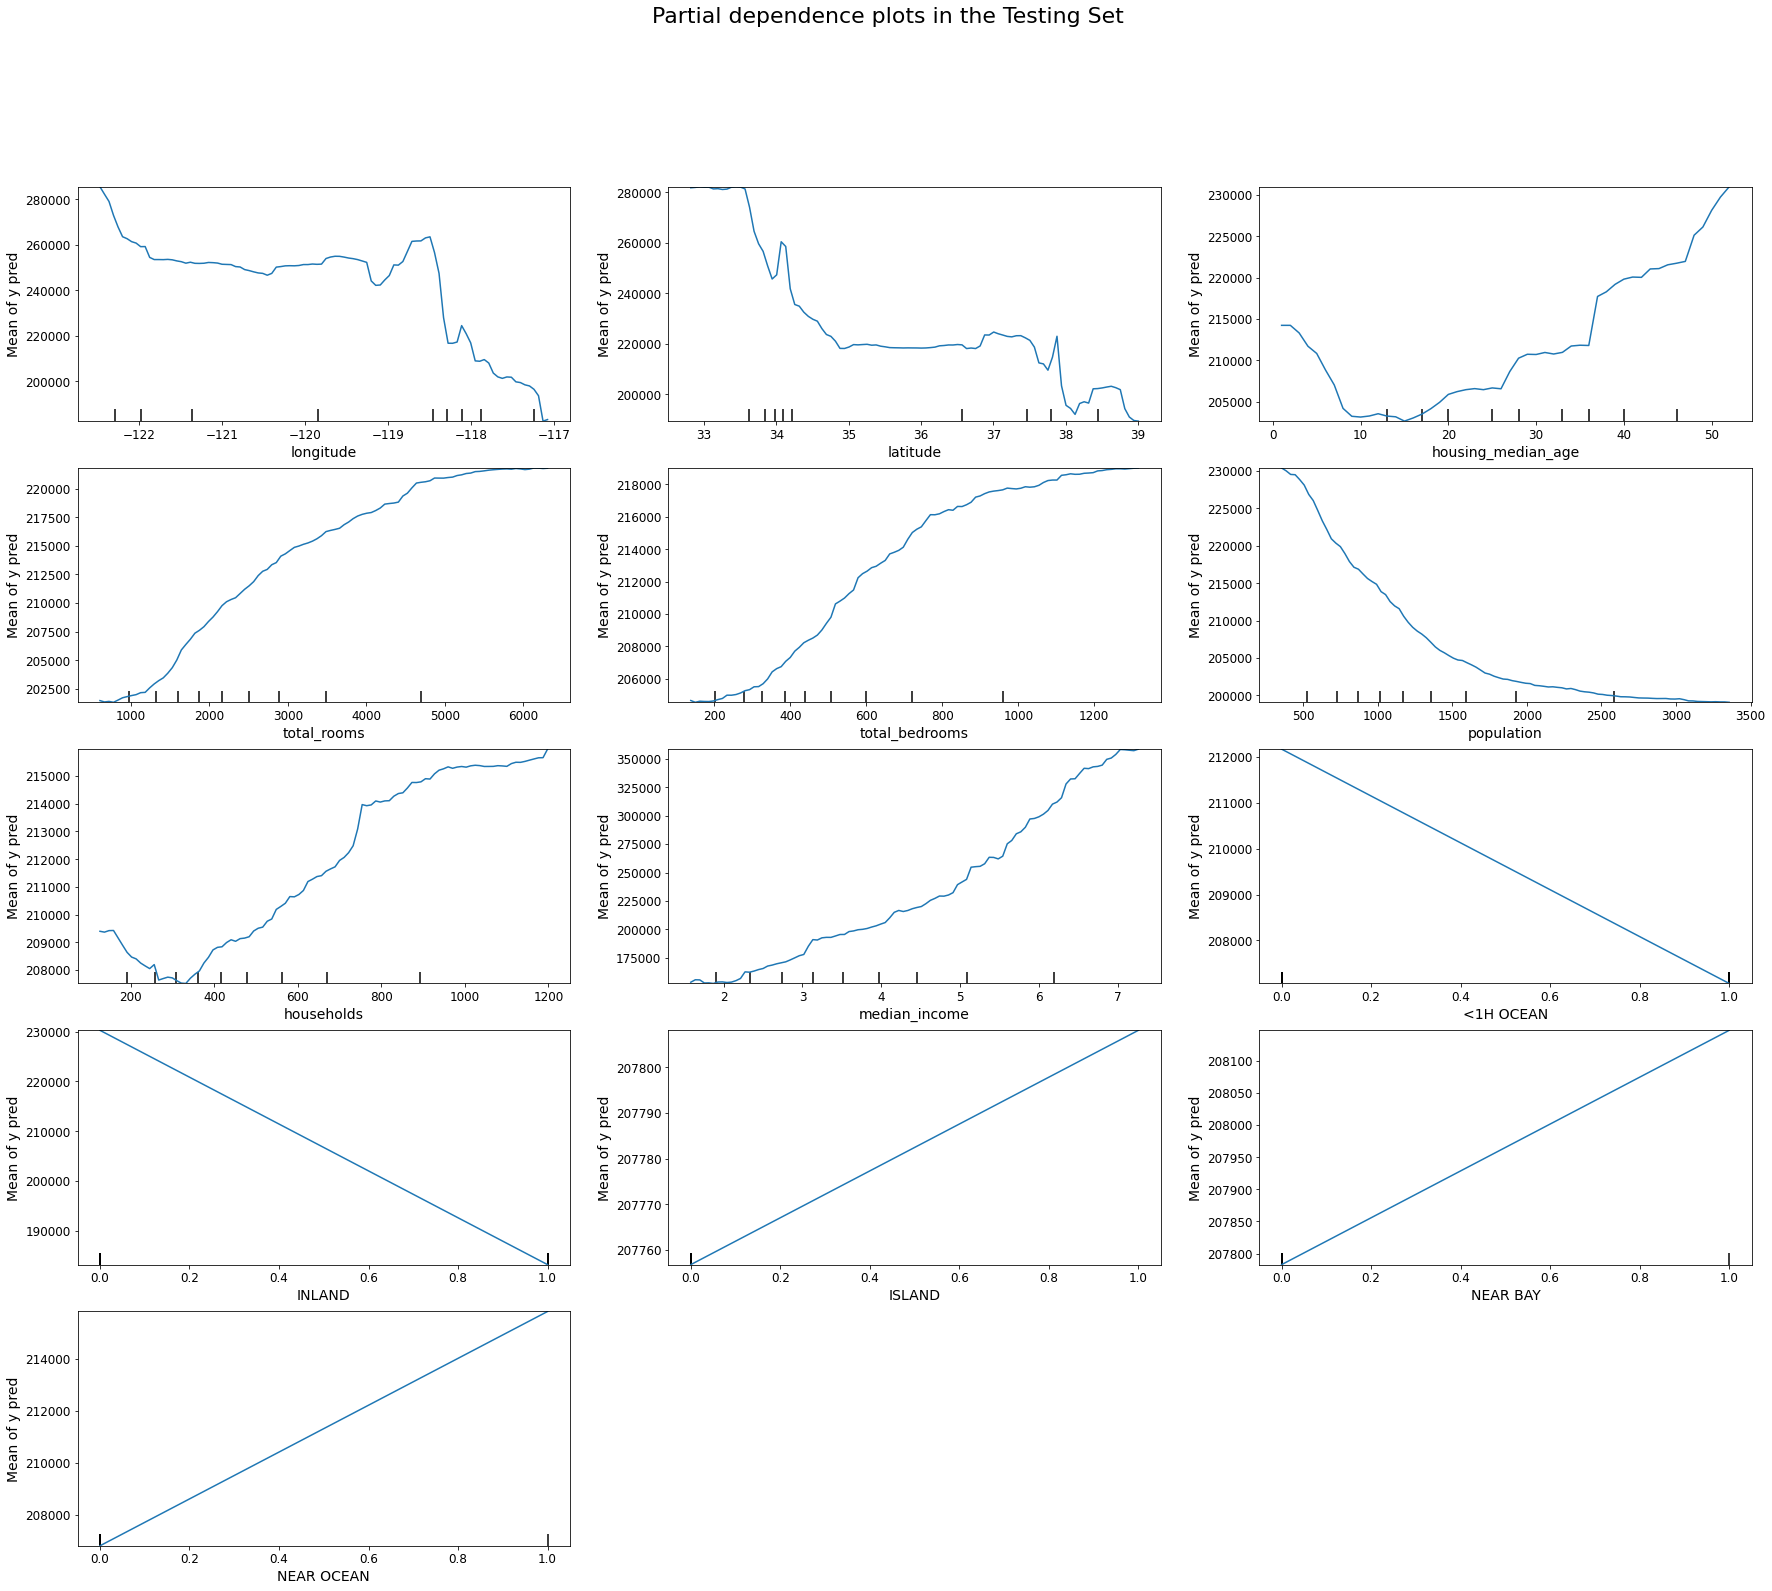

In [ ]:
# partial dependence plots in test set
partial_dependence_plots("Testing", rf_model, X_test, y_test, X_test.columns)

**TASK. Think about the following questions**  
What do you learn from the plots above?  
Do they help make the model more interpretable?

 # **4. SHAP Explanation Force Plots** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)


- We will use SHAP to explain individual predictions. We can use the fast TreeSHAP estimation method instead of the slower KernelSHAP method, since a random forest is an ensemble of trees.

- Since SHAP computes Shapley values, the interpretation is the same as in the [Shapley value chapter](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley. But with the Python shap package comes a different visualization: You can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

- The following figure shows SHAP explanation force plots for the California Housing Prices dataset.

In [ ]:
#!pip install shap

In [ ]:
test_tree_model = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=123)

test_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [ ]:
# import shap library
!pip install shap
import shap

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(test_tree_model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

     |████████████████████████████████| 327kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456459 sha256=f672b9bbc463a259bf8052ce643c5dbcde8017cd7be52e939e80b6669f05578d
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


### **Interpretation**

- The above plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red and those pushing the prediction lower are in blue.

- So, `housing_median_age` pushes the prediction higher and `median_income`,`latitude` and `longitude` pushes the prediction lower.

- The base value of the `median_house_value` is 2.063e+5 = 206300.

- The output value is 70189.83 with `housing_median_age=52`, `median_income=1.975`, `latitude=36.73` and  `longitude=-119.8`.

If we take many explanations such as the one shown above, rotate them 90 degrees, and then stack them horizontally, we can see explanations for an entire dataset as shown below. The following plot is interactive. Just scroll the mouse and see the different values.

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

 # **5. SHAP Feature Importance** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


- The idea behind SHAP feature importance is simple. Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data.

- Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the trained random forest model.

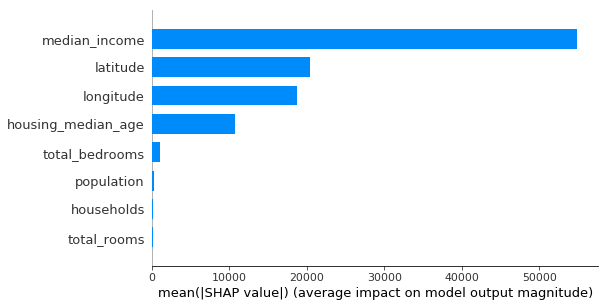

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

- The above plot shows the SHAP feature importance measured as the mean absolute Shapley values. 

- The variable `median_income` was the most important feature, changing the predicted `median_house_value` on average by 56000 on x-axis.

- SHAP is based on magnitude of feature attributions. The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

# **6. SHAP Summary Plot** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. 

- The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.


In [ ]:
shap.summary_plot(shap_values, X_train)

NameError: ignored

- The above plot shows the SHAP summary plot. The summary plot combines feature importance with feature effects. 

- Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

- This plot is made of all the dots in the train data. It demonstrates the following information:

  - *Feature importance*: Variables are ranked in descending order.
  - *Impact*: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
  - *Original value*: Color shows whether that variable is high (in red) or low (in blue) for that observation.
  - *Correlation*: A high level of the `median_income` has a high and positive impact on the `median_house_value`. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. 
  
- Similarly, `housing_median_age` is positively correlated with the target variable `median_house_value`.

# **7. SHAP Dependence Plot** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


- The SHAP Dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model  It tells whether the relationship between the target and a feature is linear, monotonic or more complex. 

- We can create a dependence plot as follows:-

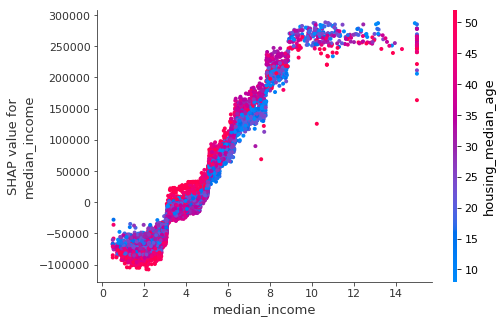

In [ ]:
shap.dependence_plot('median_income', shap_values, X_train)

- The function automatically includes another variable that the chosen variable interacts most with. The above plot shows there is an approximately linear and positive trend between `median_income` and the target variable, and `median_income` interacts with `housing_median_age` frequently.

- Now, suppose we want to know `longitude` and the variable that it interacts the most.

- We can do `shap.dependence_plot(“longitude”, shap_values, X_train). 

- The plot below shows there exists an approximately linear but negative relationship between `longitude` and the target variable. This negative relationship is already demonstrated in the variable importance plot. It interacts with `median_income` variable frequently.

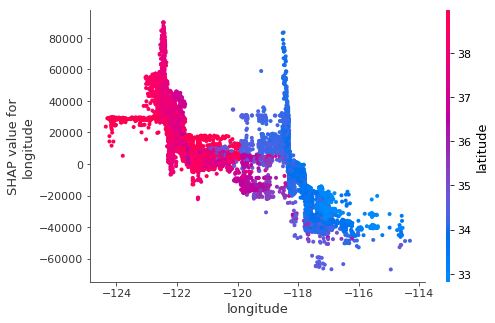

In [ ]:
shap.dependence_plot('longitude', shap_values, X_train)

## A Few Important Topics We Are Leaving Out 

Our treatment of these topics is quite limited, so we are naturally leaving out several important topics. For those of you who are interested in more depth, here are a few items and pointers:
   - You may recall that when we created the decision tree, there were several levers that we could specify, such as for instance `max_depth`. There values, which are sometimes called **hyper-parameters**, are very important in practice, and can carry a critical influence of the performance of the ML algorithm in new data (as the brief discussion above hopefully convinced you.) There is a systematic way to search for their values, using a technique called cross-validation, and modern R or Python packages will have an implementation of this (e.g. [here is](https://scikit-learn.org/stable/modules/cross_validation.html) a description for SciKit Learn). 
   - In practice, you may want more flexibility when defining the performance metrics of your ML model. For instance, instead of simply judging predictive accuracy (using, e.g., `mse`), you may want to define your own scoring rule. Modern packages will allow you to do this -- for instance, [here is a description for SciKitLearn](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). 
   - In practice, you may want to engage in further Feature Engineering, i.e., adding more features to your initial model based on transformations of existing features.
   - 

<a id="10"></a>
## 10. References:

 - [An Introduction to Statistical Learning with Applications in R](https://www.springer.com/gp/book/9781461471370) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani. Excellent and very accesible reference for conceptual elements + implementation in R.
 - [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) by Aurélien Géron. Great reference for Machine Learning in Python, primarily on the coding and implementation side.
 - [Interpretable ML Book: A Guide to Making Black-Box Models Interpretable](https://christophm.github.io/interpretable-ml-book/) by Christoph Molnar. Great reference for going deeper on the topic of Interpretable Machine Learning.